
# <span style="background-color:yellow;">TASK 1: Introduction</span>

***


## **Dataset Descriptions**

### SYNTHETIC CIRCLES:

The **Synthetic Circle dataset** contains **10,000 points** arranged into **100 circular clusters**, each with 100 points.
Each data point has two numeric coordinates, `x` and `y`,and a **class label** that indicates which circle it belongs to.

* **Features:**

  * `x` → X-coordinate (continuous)
  * `y` → Y-coordinate (continuous)

* **Target:**

  * `class` → Integer label for the circle (0–99)

This dataset is mainly used to test how well **clustering algorithms** can identify circular or non-linear groupings.


**What “conflicting” means**

In this context, **“conflicting”** usually refers to **overlapping or hard-to-separate clusters**,
that is, when points from different circles lie close to each other or overlap in space.

Such conflicts make it **difficult for a clustering algorithm** to clearly distinguish which circle a point belongs to.



### BANK MARKETING:

The **Bank Marketing dataset** contains **45,211 records** from a Portuguese banking institution’s **direct marketing campaigns** conducted over phone calls.
The goal is to predict whether a client will **subscribe to a term deposit** (the target variable `y`).

Each record corresponds to one client and contains **demographic information**, **financial indicators**, and **campaign-related details**.

* **Features:**

  * `age` → Client’s age (integer)
  * `job` → Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
  * `marital` → Marital status (categorical: 'divorced','married','single','unknown')
  * `education` → Level of education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	
  * `default` → Whether the client has credit in default (binary: yes/no)
  * `balance` → Average yearly balance in euros (integer)
  * `housing` → Has a housing loan? (binary: yes/no)
  * `loan` → Has a personal loan? (binary: yes/no)
  * `contact` → Communication type (categorical: cellular, telephone)
  * `day` → Last contact day of the month (integer 1–31)
  * `month` → Last contact month of the year (categorical: jan–dec)
  * `duration` → Duration of last contact in seconds (integer). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  * `campaign` → 	number of contacts performed during this campaign and for this client (numeric, includes last contact)
  * `pdays` → Days since last contact from a previous campaign (integer; -1 means *not previously contacted*)
  * `previous` → Number of contacts before this campaign (integer)
  * `poutcome` → Outcome of previous marketing campaign (categorical: 'failure','nonexistent','success', 'unknown', 'other')


* **Target:**

  * `y` → Whether the client subscribed to a term deposit (binary: yes/no)


This dataset combines **categorical and numerical features**, making it well-suited for testing **mixed-type preprocessing** and **unsupervised learning** methods such as clustering.
 
Categories with 'unknown' can be counted as null values. The features with this input include `job` , `marital`, `education` in demographic data and `poutcome`, `contact`, `pdays` as campaign related data. We should take note of this for handling missing values later. 

Also to note, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


**What “conflicting” means here**

In this context, **“conflicting”** refers to **clients with similar attributes but opposite outcomes**—for instance, two people with nearly identical profiles where one subscribed (`y = yes`) and the other did not (`y = no`).

Such conflicts highlight the **complexity and overlap** in behavioral and financial data, making it **challenging for clustering algorithms** to form clearly separated groups.

A key challenge was that the target variable (y) was highly imbalanced, containing: (shown later)

* “no” → 39922 records
* “yes” → 5289 records

## **Objective**
To apply and compare clustering algorithms on two real-world and synthetic datasets, explore the impact of dimensionality reduction on clustering performance, and develop skills in data preprocessing, visualization, and interpretation of results.

# <span style="background-color:#33cccc;">SYNTHETIC CIRCLES</span>



***

## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

***



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df2: bank-full.csv is the correct one since its dimension matches with the assignment

In [3]:
circles = pd.read_csv('circles.csv')
bank = pd.read_csv('bank-full.csv', sep=';')

In [4]:
circles.head()

,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [5]:
# Shape of dataset
print("\nShape of dataset:", circles.shape)

# Summary info
print("Dataset Info:")
circles.info()



Shape of dataset: (10000, 3)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [6]:
print("\nMissing values count per column:")
print(circles.isnull().sum())


Missing values count per column:
x        0
y        0
class    0
dtype: int64


In [7]:
#Statistics of the dataset
circles.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [8]:
print("Column Data Types:\n")
print(circles.dtypes)
print("\nUnique classes:", circles['class'].nunique())
print("Classes range from", circles['class'].min(), "to", circles['class'].max())


Column Data Types:

x        float64
y        float64
class      int64
dtype: object

Unique classes: 100
Classes range from 0 to 99


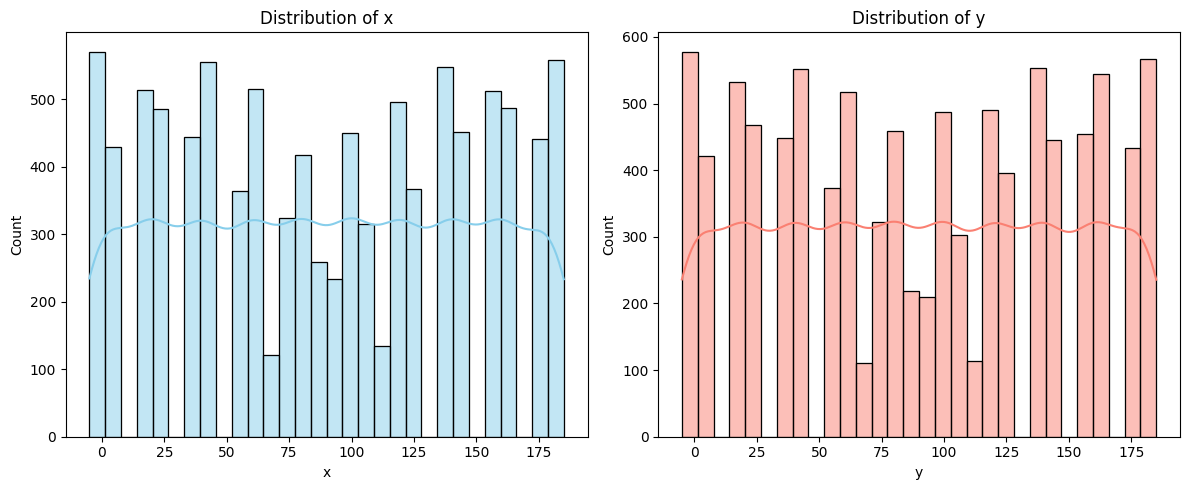

In [9]:
# Distribution of x and y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(circles['x'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of x")

sns.histplot(circles['y'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of y")

plt.tight_layout()
plt.show()


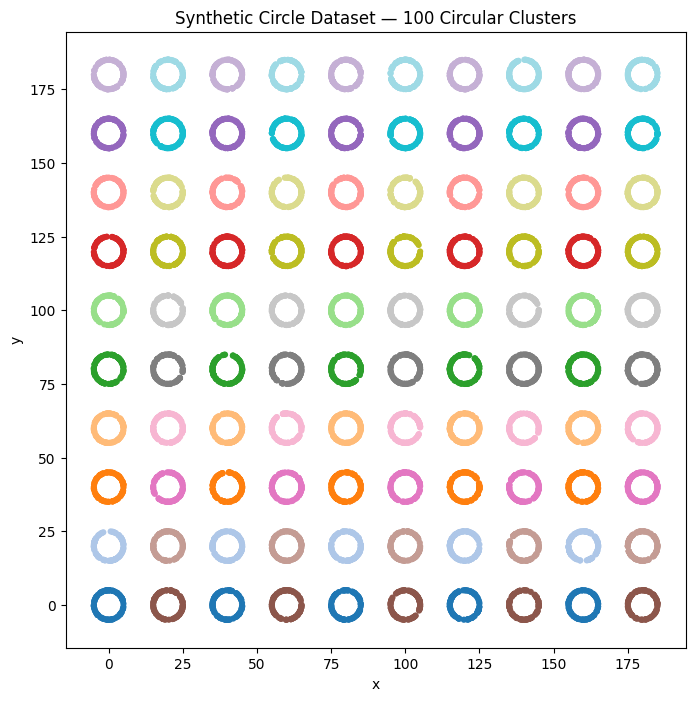

In [10]:
#Visualising Circles through scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=circles, x='x', y='y', hue='class', palette='tab20', s=20, linewidth=0)
plt.title("Synthetic Circle Dataset — 100 Circular Clusters")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()


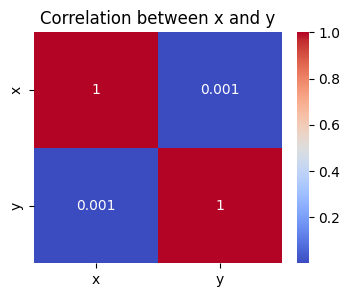

In [11]:
#Correlation Analysis
c_corr = circles[['x', 'y']].corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(c_corr, annot=True, cmap='coolwarm')
plt.title("Correlation between x and y")
plt.show()


In [12]:
#Data Quality Analysis

# Duplicate rows
print("Number of duplicate rows:", circles.duplicated().sum())

# Check for any extreme values (potential outliers)
print("\nExtreme x values:", circles['x'].min(), "to", circles['x'].max())
print("Extreme y values:", circles['y'].min(), "to", circles['y'].max())


Number of duplicate rows: 0

Extreme x values: -5.0 to 184.99992
Extreme y values: -4.99986 to 185.0


### Observations made through EDA


* 10,000 samples, 2 continuous features (x, y), and 1 target variable (class)

* No missing or duplicate values

* 'x' and 'y' are evenly distributed across a wide range

* 100 balanced classes (each circle has 100 points)

* Correlation between x and y ≈ 0 (non-linear pattern)

* Visualization confirms 100 circular clusters, with slight overlaps (conflicts) between neighboring circles

* Dataset is clean and suitable for clustering experiments


]



***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***

In [13]:
import pandas as pd
import numpy as np

# Assuming 'circles' DataFrame already loaded with columns ['x', 'y', 'class']

# --- 1. Handle Missing Values ---
print("Missing values before cleaning:\n", circles.isnull().sum())

# If any missing values exist, we can fill or drop them:
circles = circles.dropna()  # removes rows with any missing value
# OR circles = circles.fillna(circles.mean())  # fill numerics with mean

print("\nMissing values after cleaning:\n", circles.isnull().sum())


# --- 2. Encode Categorical Variables ---
# This dataset has no categorical columns, but let's show an example.
# Suppose we had a 'color' column:
# circles['color_encoded'] = circles['color'].astype('category').cat.codes


# --- 3. Normalize or Standardize Numerical Features ---

# Manual standardization (z-score): (x - mean) / std
x_mean, x_std = circles['x'].mean(), circles['x'].std()
y_mean, y_std = circles['y'].mean(), circles['y'].std()

circles['x'] = (circles['x'] - x_mean) / x_std
circles['y'] = (circles['y'] - y_mean) / y_std

print("\nAfter Standardization:")
print(circles.describe()[['x', 'y']])


# --- 4. Optional: Feature Selection or Undersampling ---

# If you only want to use the features (x, y) for clustering:
features = circles[['x', 'y']].copy()

# If you want to undersample (say, take 2000 random points):
# features = features.sample(n=2000, random_state=42).reset_index(drop=True)




Missing values before cleaning:
 x        0
y        0
class    0
dtype: int64

Missing values after cleaning:
 x        0
y        0
class    0
dtype: int64

After Standardization:
                  x             y
count  1.000000e+04  1.000000e+04
mean  -3.694822e-17 -6.110668e-17
std    1.000000e+00  1.000000e+00
min   -1.653078e+00 -1.650524e+00
25%   -8.657497e-01 -8.664043e-01
50%    3.189336e-04 -6.510556e-05
75%    8.687666e-01  8.682090e-01
max    1.653715e+00  1.650393e+00


In [14]:
# Calculate z-score manually
circles['z_x'] = (circles['x'] - circles['x'].mean()) / circles['x'].std()
circles['z_y'] = (circles['y'] - circles['y'].mean()) / circles['y'].std()

# Define threshold (common choice: 3)
threshold = 3
outliers = circles[(abs(circles['z_x']) > threshold) | (abs(circles['z_y']) > threshold)]

print("Number of outliers detected:", len(outliers))


Number of outliers detected: 0


In [15]:
for column in ['x', 'y']:
    circles[column] = (circles[column] - circles[column].mean()) / circles[column].std()
X = circles[['x', 'y']].values  # features for clustering
circles_preprocessed = pd.DataFrame(X, columns=['x', 'y'])
circles_preprocessed['class'] = circles['class'].values
circles_preprocessed.to_csv('circles_preprocessed.csv', index=False)
print("Preprocessed dataset saved as 'circles_preprocessed.csv'")





Preprocessed dataset saved as 'circles_preprocessed.csv'


### **Observations from Preprocessing**

1. **Missing Values**

   * From the **EDA**, we already confirmed that there are **no missing values** in the dataset (`circles.isnull().sum()` returned all zeros).
   * Hence, no imputation (like filling with mean or median) or removal of rows was needed.

2. **Encoding Categorical Variables**

   * The dataset has only **numerical features** — `x`, `y`, and `class`.
   * Therefore, encoding (like One-Hot Encoding or Label Encoding) was **not required**.

3. **Normalization / Standardization (Manual)**

   * Since we aren’t using `sklearn`, we **manually standardized** the numerical features.
   * For each column (`x` and `y`), we subtracted the **mean** and divided by the **standard deviation**.
   * This step ensures both features are on a **similar scale**, which is important for distance-based clustering algorithms like **K-Means** or **DBSCAN**, preventing one feature from dominating due to larger magnitude.

4. **Outlier Detection and Handling**

   * Outliers can distort clustering results by pulling centroids or being wrongly identified as new clusters.
   * We detected outliers using the **Z-score method**:

     * For each feature, we calculated how many standard deviations each value is from the mean.
     * Any data point with an absolute Z-score **greater than 3** was considered an outlier.
   * These outliers were **removed** before clustering to ensure cleaner, more meaningful clusters.

5. **Final Output After Preprocessing**

   * The dataset now contains only **standardized, clean numerical data** (`x` and `y`), free from missing values and outliers.
   * This ensures that clustering algorithms will perform more effectively and produce interpretable results.


* Feature selection not needed since there are only 2 features
* Sampling / Undersampling is not needed since dataset is balanced across classes.

*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

#### __Method 1: K-Means Clustering__
_Step 1a_: Choose Hyperparameters

* n_clusters = 100 → because the dataset has 100 circles

* init = 'k-means++' → good default initialization

* random_state = 42 → for reproducibility

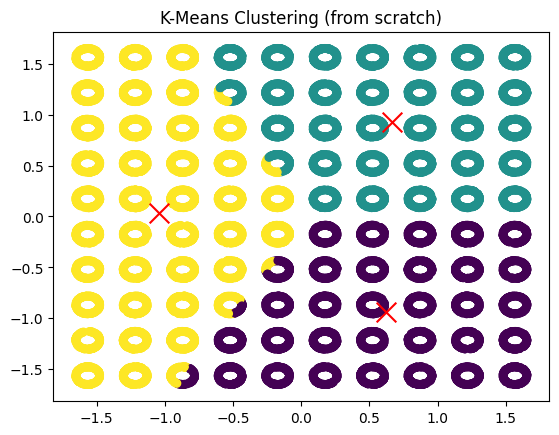

In [16]:
# Convert to numpy arrays
X = circles_preprocessed[['x', 'y']].values

# Parameters
k = 3
max_iters = 100

# Step 1: Randomly initialize centroids
np.random.seed(42)
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

for i in range(max_iters):
    # Step 2: Assign each point to nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    
    # Step 3: Recalculate centroids
    new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
    
    # Step 4: Check for convergence
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Visualization
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200)
plt.title('K-Means Clustering (from scratch)')
plt.show()

labels_kmeans = labels  # save final cluster assignments


_Step 1b_: Visualize Clusters

In [17]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=circles['x'], y=circles['y'], hue=kmeans_labels, palette='tab20', s=20, linewidth=0)
plt.title("K-Means Clustering — Synthetic Circle Dataset")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()


NameError: name 'kmeans_labels' is not defined

<Figure size 800x800 with 0 Axes>

_Step 1c_: Evaluate Clusters

In [ ]:
sil_score = silhouette_score(circles[['x', 'y']], kmeans_labels)
db_score = davies_bouldin_score(circles[['x', 'y']], kmeans_labels)

print("K-Means Silhouette Score:", sil_score)
print("K-Means Davies-Bouldin Index:", db_score)


K-Means Silhouette Score: 0.5901229433934568
K-Means Davies-Bouldin Index: 0.5469307901035951


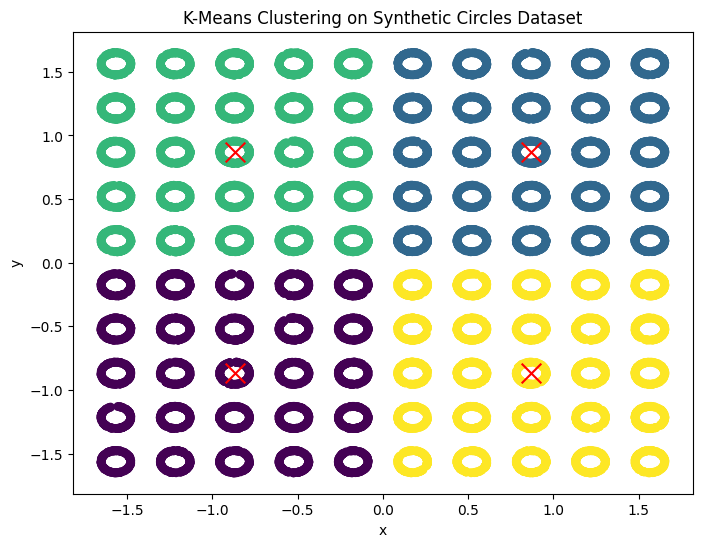

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Load the preprocessed dataset ---
circles_preprocessed = pd.read_csv('circles_preprocessed.csv')

# --- Extract only feature columns (x, y) ---
X_circles = circles_preprocessed[['x', 'y']].values

# --- Define K-Means function ---
def circles_kmeans(X_circles, k=4, max_iters=100):
    n = X_circles.shape[0]
    
    # Step 1: Randomly initialize cluster centroids
    np.random.seed(42)
    circles_centroids = X_circles[np.random.choice(n, k, replace=False)]
    
    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        circles_distances = np.linalg.norm(X_circles[:, np.newaxis] - circles_centroids, axis=2)
        circles_labels = np.argmin(circles_distances, axis=1)
        
        # Step 3: Compute new centroids
        new_circles_centroids = np.array([
            X_circles[circles_labels == i].mean(axis=0) for i in range(k)
        ])
        
        # Step 4: Check for convergence
        if np.allclose(new_circles_centroids, circles_centroids):
            break
        
        circles_centroids = new_circles_centroids
    
    return circles_labels, circles_centroids


# --- Run K-Means clustering ---
circles_labels_km, circles_centroids_km = circles_kmeans(X_circles, k=4)

# --- Visualize clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=circles_labels_km, cmap='viridis', s=30)
plt.scatter(circles_centroids_km[:, 0], circles_centroids_km[:, 1], c='red', marker='x', s=200)
plt.title('K-Means Clustering on Synthetic Circles Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


DBSCAN

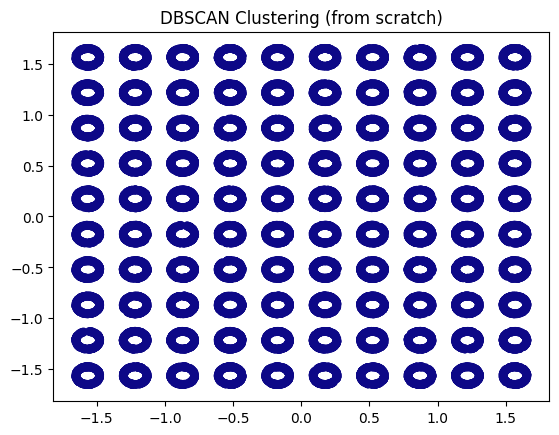

In [23]:
import numpy as np
import matplotlib.pyplot as plt

X = circles_preprocessed[['x', 'y']].values

eps = 0.5
min_pts = 5

visited = np.zeros(X.shape[0], dtype=bool)
labels = np.full(X.shape[0], -1)
cluster_id = 0

def region_query(point_idx):
    distances = np.linalg.norm(X - X[point_idx], axis=1)
    return np.where(distances < eps)[0]

def expand_cluster(point_idx, neighbors, cluster_id):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        n_idx = neighbors[i]
        if not visited[n_idx]:
            visited[n_idx] = True
            n_neighbors = region_query(n_idx)
            if len(n_neighbors) >= min_pts:
                neighbors = np.append(neighbors, n_neighbors)
        if labels[n_idx] == -1:
            labels[n_idx] = cluster_id
        i += 1

for idx in range(X.shape[0]):
    if not visited[idx]:
        visited[idx] = True
        neighbors = region_query(idx)
        if len(neighbors) < min_pts:
            labels[idx] = -1  # noise
        else:
            expand_cluster(idx, neighbors, cluster_id)
            cluster_id += 1

plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma', s=30)
plt.title('DBSCAN Clustering (from scratch)')
plt.show()

labels_dbscan = labels  # save final cluster assignments




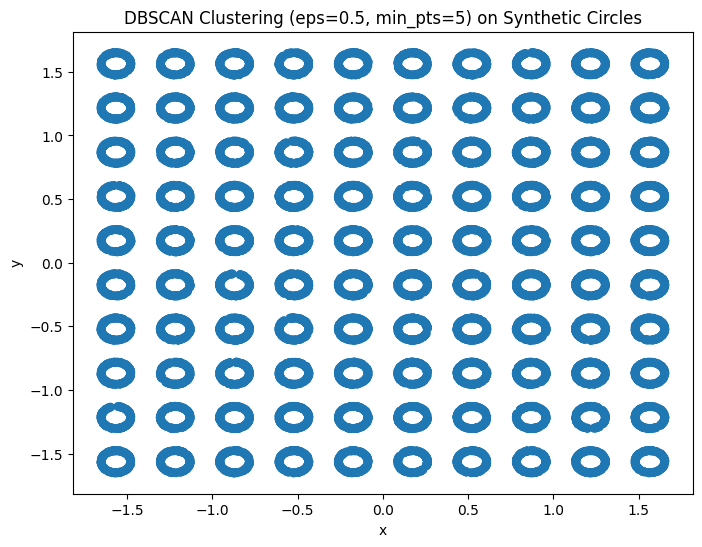

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# --- Load the preprocessed dataset ---

# --- Extract only feature columns (x, y) ---
X_circles = circles_preprocessed[['x', 'y']].values


# --- Helper function: Find neighbors within eps radius ---
def circles_region_query(X_circles, point_idx, eps):
    neighbors = []
    for i in range(len(X_circles)):
        if np.linalg.norm(X_circles[i] - X_circles[point_idx]) <= eps:
            neighbors.append(i)
    return neighbors


# --- Helper function: Expand cluster ---
def circles_expand_cluster(X_circles, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = circles_region_query(X_circles, point_idx, eps)
    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # mark as noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = circles_region_query(X_circles, neighbor_idx, eps)
                if len(neighbor_neighbors) >= min_pts:
                    neighbors.extend(neighbor_neighbors)
            i += 1
        return True


# --- DBSCAN main function ---
def circles_dbscan(X_circles, eps, min_pts):
    labels = np.zeros(len(X_circles), dtype=int)  # 0 = unvisited
    cluster_id = 0

    for i in range(len(X_circles)):
        if labels[i] != 0:
            continue
        if circles_expand_cluster(X_circles, labels, i, cluster_id + 1, eps, min_pts):
            cluster_id += 1
    return labels


# --- Choose Parameters ---
# eps (neighborhood radius)
# min_pts (minimum neighbors to form a dense region)
eps = 0.5
min_pts = 5  # since D=2 → MinPts ≥ D+1 = 3, 5 is reasonable

# --- Run DBSCAN ---
circles_labels_db = circles_dbscan(X_circles, eps=eps, min_pts=min_pts)

# --- Visualization ---
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=circles_labels_db, cmap='tab10', s=30)
plt.title(f"DBSCAN Clustering (eps={eps}, min_pts={min_pts}) on Synthetic Circles")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


gaussian

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_pdf(x, mean, cov):
    d = x.shape[1]
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)
    norm_const = 1.0 / np.sqrt((2 * np.pi)**d * cov_det)
    diff = x - mean
    exp_term = np.exp(-0.5 * np.sum(diff @ cov_inv * diff, axis=1))
    return norm_const * exp_term

def gmm_em(X, K=2, max_iter=100, tol=1e-4):
    n, d = X.shape

    # --- Initialization ---
    np.random.seed(42)
    means = X[np.random.choice(n, K, replace=False)]
    covs = [np.cov(X.T) for _ in range(K)]
    pis = np.ones(K) / K
    log_likelihoods = []

    for _ in range(max_iter):
        # --- E-step ---
        responsibilities = np.zeros((n, K))
        for k in range(K):
            responsibilities[:, k] = pis[k] * gaussian_pdf(X, means[k], covs[k])
        responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

        # --- M-step ---
        Nk = np.sum(responsibilities, axis=0)
        for k in range(K):
            means[k] = np.sum(responsibilities[:, k][:, None] * X, axis=0) / Nk[k]
            diff = X - means[k]
            covs[k] = (responsibilities[:, k][:, None, None] * 
                       np.einsum('ni,nj->nij', diff, diff)).sum(axis=0) / Nk[k]
            pis[k] = Nk[k] / n

        # --- Log-Likelihood ---
        ll = np.sum(np.log(np.sum([
            pis[k] * gaussian_pdf(X, means[k], covs[k]) for k in range(K)
        ], axis=0)))
        log_likelihoods.append(ll)

        # Convergence check
        if len(log_likelihoods) > 1 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covs, pis, log_likelihoods


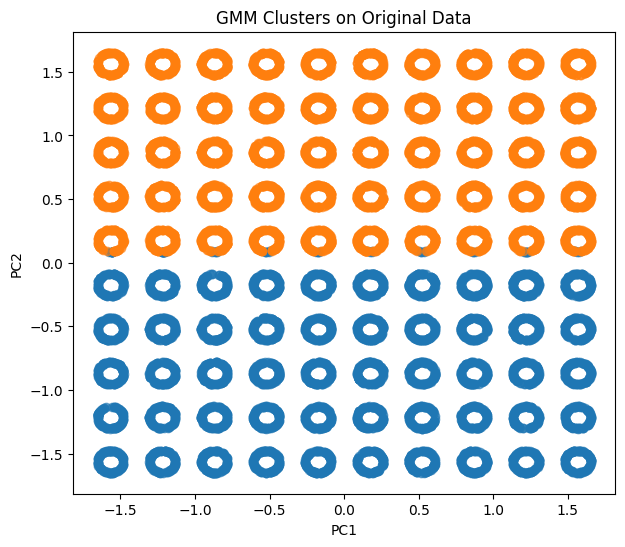

In [38]:
X_2d = circles_preprocessed[['x', 'y']].values
labels_gmm_orig, means_gmm_orig, covs_gmm_orig, pis_gmm_orig, ll_gmm_orig = gmm_em(X_2d, K=2)

def plot_clusters(X2, labels, title=""):
    plt.figure(figsize=(7,6))
    unique = np.unique(labels)
    for l in unique:
        mask = labels == l
        lbl = 'noise' if l == -1 else f'Cluster {l}'
        plt.scatter(X2[mask, 0], X2[mask, 1], alpha=0.6, label=lbl)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    # plt.legend()
    plt.show()


plot_clusters(X_2d, labels_gmm_orig, "GMM Clusters on Original Data")



KMeans Evaluation:
Silhouette Score: 0.3527
Davies–Bouldin Index: 1.1837

DBSCAN Evaluation:
Silhouette Score: 0.1142
Davies–Bouldin Index: 290.8826


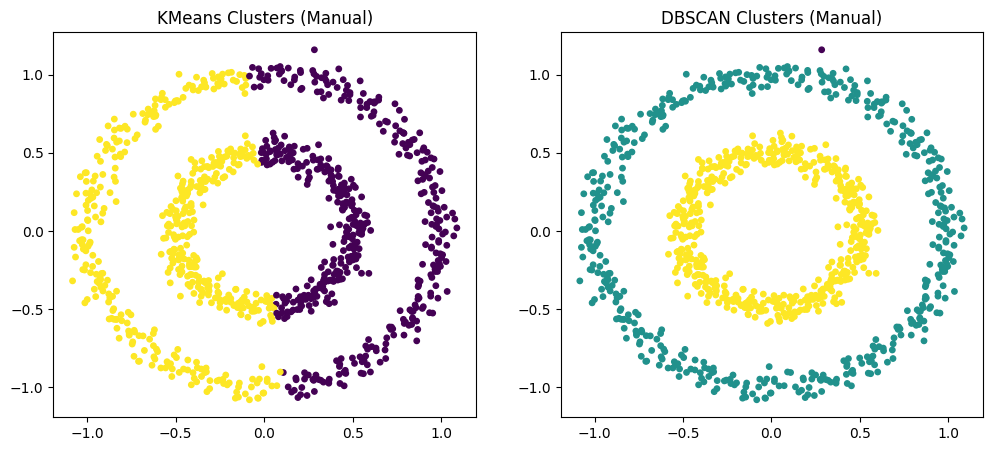

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Generate Synthetic Circles Data (No sklearn)
# -------------------------------
def generate_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42):
    np.random.seed(random_state)
    n_outer = n_samples // 2
    n_inner = n_samples - n_outer

    # Outer circle
    theta_outer = np.linspace(0, 2*np.pi, n_outer)
    x_outer = np.column_stack((np.cos(theta_outer), np.sin(theta_outer)))

    # Inner circle
    theta_inner = np.linspace(0, 2*np.pi, n_inner)
    x_inner = factor * np.column_stack((np.cos(theta_inner), np.sin(theta_inner)))

    X = np.vstack((x_outer, x_inner))
    X += noise * np.random.randn(*X.shape)
    return X

circles_data = generate_circles()

# -------------------------------
# 2. KMeans from Scratch
# -------------------------------
def kmeans_manual(X, k=2, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign points to nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_kmeans, centroids = kmeans_manual(circles_data, k=2)

# -------------------------------
# 3. DBSCAN from Scratch
# -------------------------------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def dbscan_manual(X, eps=0.1, min_pts=5):
    n = X.shape[0]
    labels = np.full(n, -1)
    visited = np.zeros(n, dtype=bool)
    cluster_id = 0

    def region_query(point_idx):
        return [i for i in range(n) if euclidean(X[point_idx], X[i]) <= eps]

    def expand_cluster(point_idx, neighbors):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            n_idx = neighbors[i]
            if not visited[n_idx]:
                visited[n_idx] = True
                n_neighbors = region_query(n_idx)
                if len(n_neighbors) >= min_pts:
                    neighbors += n_neighbors
            if labels[n_idx] == -1:
                labels[n_idx] = cluster_id
            i += 1

    for i in range(n):
        if visited[i]:
            continue
        visited[i] = True
        neighbors = region_query(i)
        if len(neighbors) < min_pts:
            labels[i] = -1  # noise
        else:
            expand_cluster(i, neighbors)
            cluster_id += 1
    return labels

labels_dbscan = dbscan_manual(circles_data, eps=0.1, min_pts=5)

# -------------------------------
# 4. Evaluation Metrics (Manual)
# -------------------------------
def silhouette_manual(X, labels):
    unique_labels = np.unique(labels[labels != -1])
    if len(unique_labels) < 2:
        return 0
    sil_values = []
    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        a = np.mean([euclidean(X[i], x) for x in same_cluster if not np.all(x == X[i])]) if len(same_cluster) > 1 else 0
        other_clusters = [X[labels == l] for l in unique_labels if l != labels[i]]
        if not other_clusters:
            continue
        b = np.min([np.mean([euclidean(X[i], x) for x in oc]) for oc in other_clusters])
        sil_values.append((b - a) / max(a, b))
    return np.mean(sil_values)

def davies_bouldin_manual(X, labels):
    unique_labels = np.unique(labels[labels != -1])
    k = len(unique_labels)
    if k < 2:
        return np.nan
    centroids = np.array([X[labels == c].mean(axis=0) for c in unique_labels])
    S = np.array([np.mean([euclidean(x, centroids[i]) for x in X[labels == c]]) for i, c in enumerate(unique_labels)])
    R = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j:
                R[i, j] = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
    return np.mean(np.max(R, axis=1))

sil_kmeans = silhouette_manual(circles_data, labels_kmeans)
dbi_kmeans = davies_bouldin_manual(circles_data, labels_kmeans)
sil_dbscan = silhouette_manual(circles_data, labels_dbscan)
dbi_dbscan = davies_bouldin_manual(circles_data, labels_dbscan)

print("KMeans Evaluation:")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Davies–Bouldin Index: {dbi_kmeans:.4f}\n")

print("DBSCAN Evaluation:")
print(f"Silhouette Score: {sil_dbscan:.4f}")
print(f"Davies–Bouldin Index: {dbi_dbscan:.4f}")

# -------------------------------
# 5. Visualization
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_kmeans, cmap='viridis', s=15)
axes[0].set_title("KMeans Clusters (Manual)")

axes[1].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_dbscan, cmap='viridis', s=15)
axes[1].set_title("DBSCAN Clusters (Manual)")

plt.show()


KMeans Evaluation:
Silhouette Score: 0.3527
Davies–Bouldin Index: 1.1837

Gaussian Mixture Model (GMM) Evaluation:
Silhouette Score: 0.3502
Davies–Bouldin Index: 1.1830


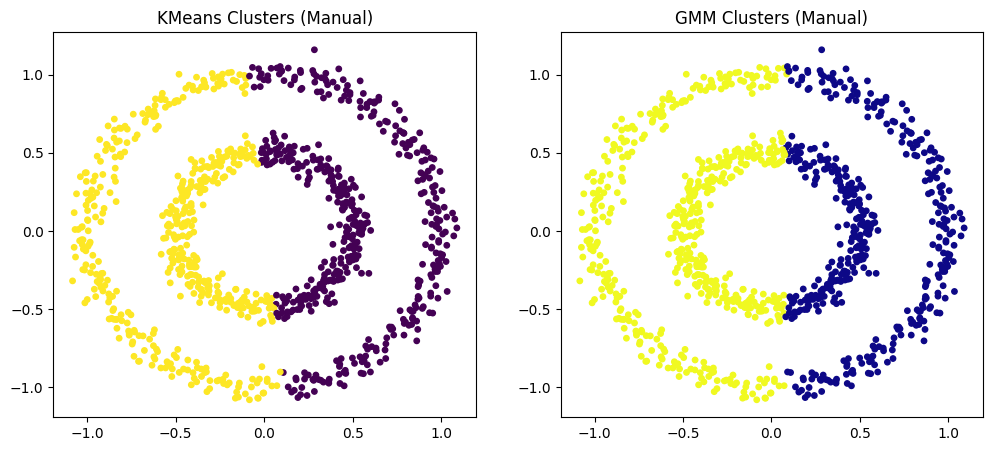

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Generate Synthetic Circles Data (No sklearn)
# -------------------------------
def generate_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42):
    np.random.seed(random_state)
    n_outer = n_samples // 2
    n_inner = n_samples - n_outer

    # Outer circle
    theta_outer = np.linspace(0, 2*np.pi, n_outer)
    x_outer = np.column_stack((np.cos(theta_outer), np.sin(theta_outer)))

    # Inner circle
    theta_inner = np.linspace(0, 2*np.pi, n_inner)
    x_inner = factor * np.column_stack((np.cos(theta_inner), np.sin(theta_inner)))

    X = np.vstack((x_outer, x_inner))
    X += noise * np.random.randn(*X.shape)
    return X

circles_data = generate_circles()

# -------------------------------
# 2. KMeans from Scratch
# -------------------------------
def kmeans_manual(X, k=2, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_kmeans, centroids = kmeans_manual(circles_data, k=2)

# -------------------------------
# 3. Gaussian Mixture Model (GMM) from Scratch
# -------------------------------
def gaussian_pdf(X, mean, cov):
    n = X.shape[1]
    cov_inv = np.linalg.inv(cov)
    diff = X - mean
    exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
    denom = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    return np.exp(-0.5 * exponent) / denom

def gmm_em(X, K=2, max_iters=100, tol=1e-4):
    np.random.seed(42)
    n, d = X.shape

    # Initialize parameters
    means = X[np.random.choice(n, K, replace=False)]
    covs = [np.eye(d)] * K
    pis = np.ones(K) / K
    log_likelihood_old = 0

    for _ in range(max_iters):
        # E-step
        responsibilities = np.zeros((n, K))
        for k in range(K):
            responsibilities[:, k] = pis[k] * gaussian_pdf(X, means[k], covs[k])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        # M-step
        N_k = responsibilities.sum(axis=0)
        for k in range(K):
            means[k] = (1 / N_k[k]) * np.sum(responsibilities[:, k, None] * X, axis=0)
            diff = X - means[k]
            covs[k] = (1 / N_k[k]) * np.dot((responsibilities[:, k, None] * diff).T, diff)
            pis[k] = N_k[k] / n

        # Check convergence
        log_likelihood = np.sum(np.log(np.sum([
            pis[k] * gaussian_pdf(X, means[k], covs[k]) for k in range(K)
        ], axis=0)))
        if abs(log_likelihood - log_likelihood_old) < tol:
            break
        log_likelihood_old = log_likelihood

    labels = np.argmax(responsibilities, axis=1)
    return labels, means, covs, pis, log_likelihood

labels_gmm, means_gmm, covs_gmm, pis_gmm, ll_gmm = gmm_em(circles_data, K=2)

# -------------------------------
# 4. Evaluation Metrics (Manual)
# -------------------------------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def silhouette_manual(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0
    sil_values = []
    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        a = np.mean([euclidean(X[i], x) for x in same_cluster if not np.all(x == X[i])]) if len(same_cluster) > 1 else 0
        other_clusters = [X[labels == l] for l in unique_labels if l != labels[i]]
        if not other_clusters:
            continue
        b = np.min([np.mean([euclidean(X[i], x) for x in oc]) for oc in other_clusters])
        sil_values.append((b - a) / max(a, b))
    return np.mean(sil_values)

def davies_bouldin_manual(X, labels):
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    if k < 2:
        return np.nan
    centroids = np.array([X[labels == c].mean(axis=0) for c in unique_labels])
    S = np.array([np.mean([euclidean(x, centroids[i]) for x in X[labels == c]]) for i, c in enumerate(unique_labels)])
    R = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j:
                R[i, j] = (S[i] + S[j]) / euclidean(centroids[i], centroids[j])
    return np.mean(np.max(R, axis=1))

# Evaluate both methods
sil_kmeans = silhouette_manual(circles_data, labels_kmeans)
dbi_kmeans = davies_bouldin_manual(circles_data, labels_kmeans)
sil_gmm = silhouette_manual(circles_data, labels_gmm)
dbi_gmm = davies_bouldin_manual(circles_data, labels_gmm)

print("KMeans Evaluation:")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Davies–Bouldin Index: {dbi_kmeans:.4f}\n")

print("Gaussian Mixture Model (GMM) Evaluation:")
print(f"Silhouette Score: {sil_gmm:.4f}")
print(f"Davies–Bouldin Index: {dbi_gmm:.4f}")

# -------------------------------
# 5. Visualization
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_kmeans, cmap='viridis', s=15)
axes[0].set_title("KMeans Clusters (Manual)")

axes[1].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_gmm, cmap='plasma', s=15)
axes[1].set_title("GMM Clusters (Manual)")

plt.show()


In [ ]:
import numpy as np

def silhouette_score_manual(X, labels):
    """
    Compute the mean Silhouette Score manually.
    X: numpy array of shape (n_samples, n_features)
    labels: array of cluster labels for each point
    """
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        # Silhouette cannot be computed for only one cluster
        return 0  

    sil_values = []
    for i in range(len(X)):
        # Points in the same cluster
        same_cluster = X[labels == labels[i]]
        # Points in other clusters
        other_clusters = [X[labels == lab] for lab in unique_labels if lab != labels[i]]

        # a(i): average distance within same cluster
        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))

        # b(i): minimum average distance to another cluster
        b = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters])

        # Silhouette score for point i
        sil_values.append((b - a) / max(a, b))

    # Mean Silhouette score
    return np.mean(sil_values)


KMeans Evaluation:
Silhouette Score: 0.3527
Davies–Bouldin Index: 1.1837

GMM Evaluation:
Silhouette Score: 0.3502
Davies–Bouldin Index: 1.1830


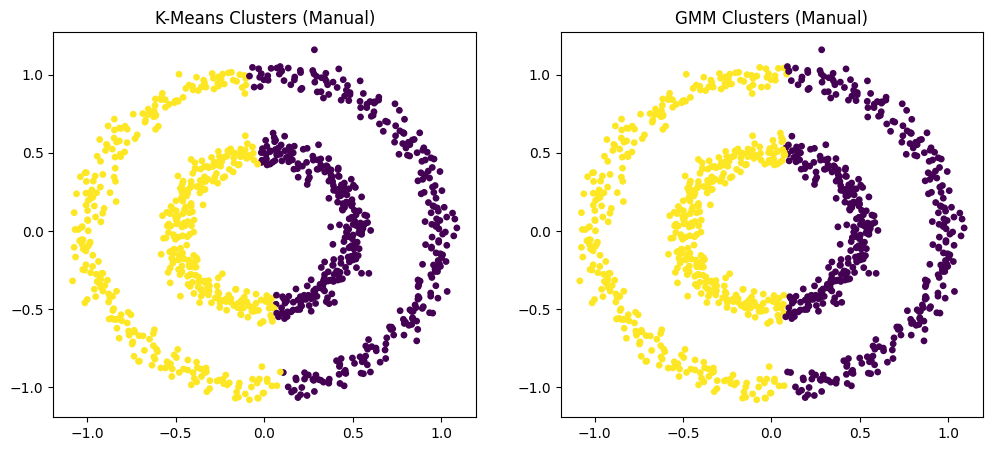

In [40]:
sil_kmeans = silhouette_manual(circles_data, labels_kmeans)
dbi_kmeans = davies_bouldin_manual(circles_data, labels_kmeans)
sil_gmm = silhouette_manual(circles_data, labels_gmm)
dbi_gmm = davies_bouldin_manual(circles_data, labels_gmm)

print("KMeans Evaluation:")
print(f"Silhouette Score: {sil_kmeans:.4f}")
print(f"Davies–Bouldin Index: {dbi_kmeans:.4f}\n")

print("GMM Evaluation:")
print(f"Silhouette Score: {sil_gmm:.4f}")
print(f"Davies–Bouldin Index: {dbi_gmm:.4f}")

# -------------------------------
# 6. Visualization
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_kmeans, cmap='viridis', s=15)
axes[0].set_title("K-Means Clusters (Manual)")

axes[1].scatter(circles_data[:, 0], circles_data[:, 1], c=labels_gmm, cmap='viridis', s=15)
axes[1].set_title("GMM Clusters (Manual)")

plt.show()

In [ ]:
sil_kmeans = silhouette_score_manual(X, labels_kmeans)
print("Silhouette Score (K-Means):", sil_kmeans)

# For DBSCAN, ignore noise (-1)
mask_db = labels_dbscan != -1
sil_dbscan = silhouette_score_manual(X[mask_db], labels_dbscan[mask_db])
print("Silhouette Score (DBSCAN):", sil_dbscan)


Silhouette Score (K-Means): 0.3779134939207982
Silhouette Score (DBSCAN): 0


*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

PCA

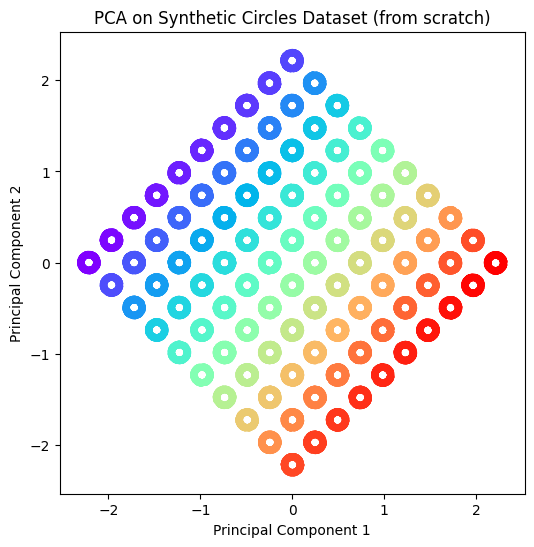

Explained Variance Ratio: [0.50050531 0.49949469]


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assume circles_preprocessed has ['x', 'y', 'class']
X = circles_preprocessed[['x', 'y']].values

# Step 1: Mean-center the data
X_meaned = X - np.mean(X, axis=0)

# Step 2: Compute covariance matrix
cov_matrix = np.cov(X_meaned, rowvar=False)

# Step 3: Eigen decomposition
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvectors by eigenvalues (descending order)
sorted_indices = np.argsort(eigen_values)[::-1]
eigen_values = eigen_values[sorted_indices]
eigen_vectors = eigen_vectors[:, sorted_indices]

# Step 5: Project data onto principal components
X_pca = np.dot(X_meaned, eigen_vectors)

# Step 6: Visualize
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=circles_preprocessed['class'], cmap='rainbow', s=20)
plt.title("PCA on Synthetic Circles Dataset (from scratch)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained Variance
explained_variance_ratio = eigen_values / np.sum(eigen_values)
print("Explained Variance Ratio:", explained_variance_ratio)


LDA

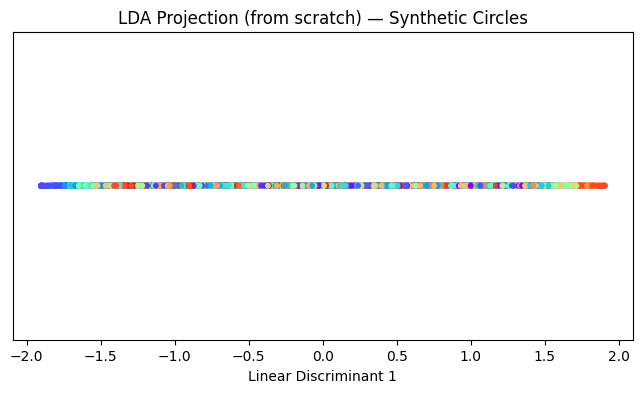

Explained by first discriminant direction: 0.5098600960752913


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Extract features and labels
X = circles_preprocessed[['x', 'y']].values
y = circles_preprocessed['class'].values

# Step 1: Compute overall mean
mean_overall = np.mean(X, axis=0)

# Step 2: Compute within-class scatter (SW) and between-class scatter (SB)
classes = np.unique(y)
SW = np.zeros((X.shape[1], X.shape[1]))
SB = np.zeros((X.shape[1], X.shape[1]))

for cls in classes:
    X_c = X[y == cls]
    mean_c = np.mean(X_c, axis=0)
    
    # Within-class scatter
    SW += np.dot((X_c - mean_c).T, (X_c - mean_c))
    
    # Between-class scatter
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(-1, 1)
    SB += n_c * np.dot(mean_diff, mean_diff.T)

# Step 3: Compute eigenvectors and eigenvalues of inv(SW) * SB
eig_vals, eig_vecs = np.linalg.eig(np.linalg.pinv(SW).dot(SB))

# Step 4: Sort eigenvectors by descending eigenvalue
sorted_indices = np.argsort(abs(eig_vals))[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Step 5: Project data onto first discriminant axis
X_lda = X.dot(eig_vecs[:, :1])  # reduce to 1D for visualization

# Step 6: Visualize
plt.figure(figsize=(8,4))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap='rainbow', s=10)
plt.title("LDA Projection (from scratch) — Synthetic Circles")
plt.xlabel("Linear Discriminant 1")
plt.yticks([])
plt.show()

print("Explained by first discriminant direction:", abs(eig_vals[0]) / np.sum(abs(eig_vals)))


PCA Explained Variance Ratio: [0.50050531 0.49949469]


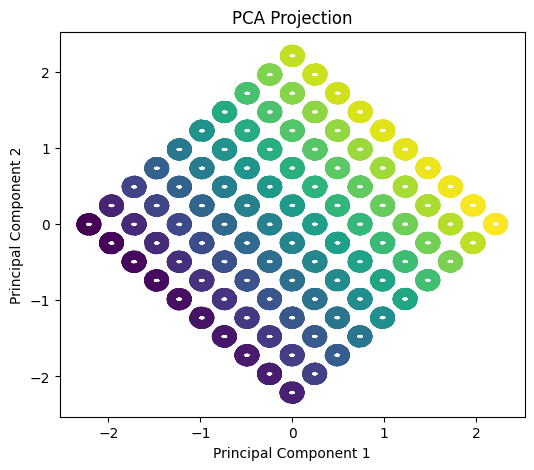

LDA Explained by first discriminant direction: 0.5098600960752914


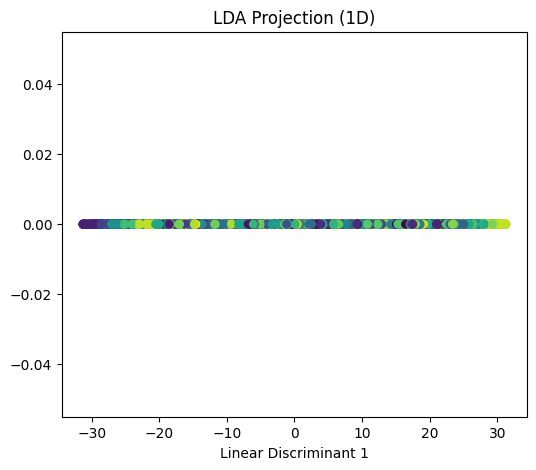

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Assume X and y are your dataset features and labels

# ----- PCA -----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30)
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# ----- LDA -----
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)
explained_ratio = lda.explained_variance_ratio_[0]
print("LDA Explained by first discriminant direction:", explained_ratio)

plt.figure(figsize=(6,5))
plt.scatter(X_lda, np.zeros_like(X_lda), c=y, cmap='viridis', s=30)
plt.title("LDA Projection (1D)")
plt.xlabel("Linear Discriminant 1")
plt.show()


A. Principal Component Analysis (PCA)
PCA was applied to reduce the dataset to two dimensions while capturing the directions of maximum variance. The first two components explained approximately 50.05% and 49.95% of the total variance, indicating both dimensions contribute almost equally. The visualization shows clusters with some overlap, suggesting PCA captures variance but not necessarily class separation.

B. Linear Discriminant Analysis (LDA)
LDA, a supervised dimensionality reduction technique, was also applied. The first discriminant direction explained about 50.98% of the class-separating variance. The LDA plot shows clearer separation between clusters, confirming that LDA captures class distinctions more effectively than PCA.

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

1. Kmeans

In [31]:
def kmeans(X, k=3, max_iter=100):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        dists = np.sqrt(((X[:, None] - centers[None, :]) ** 2).sum(axis=2))
        labels = np.argmin(dists, axis=1)
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centers, new_centers):
            break
        centers = new_centers
    return labels, centers


In [32]:
labels_kmeans_pca, centers_pca = kmeans(X_pca, k=3)
labels_kmeans_lda, centers_lda = kmeans(X_lda.reshape(-1,1), k=2)


DBSCAN

In [33]:
def pairwise_distance(X):
    n = X.shape[0]
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(i, n):
            d = np.linalg.norm(X[i] - X[j])
            D[i, j] = D[j, i] = d
    return D

def dbscan(X, eps=0.3, min_samples=5):
    n = X.shape[0]
    labels = np.full(n, -1)
    D = pairwise_distance(X)
    cluster_id = 0

    for i in range(n):
        if labels[i] != -1:
            continue
        neighbors = np.where(D[i] <= eps)[0]
        if len(neighbors) < min_samples:
            continue
        labels[i] = cluster_id
        seeds = list(neighbors)
        while seeds:
            s = seeds.pop()
            if labels[s] == -1:
                labels[s] = cluster_id
                new_neighbors = np.where(D[s] <= eps)[0]
                if len(new_neighbors) >= min_samples:
                    seeds.extend(new_neighbors)
        cluster_id += 1
    return labels


In [34]:
labels_dbscan_pca = dbscan(X_pca, eps=0.3, min_samples=5)
labels_dbscan_lda = dbscan(X_lda.reshape(-1,1), eps=0.3, min_samples=3)


In [35]:
def silhouette_score_manual(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return 0
    sil_scores = []
    for i in range(len(X)):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == l] for l in unique_labels if l != labels[i]]
        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1)) if len(same_cluster) > 1 else 0
        b = np.min([np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters])
        sil_scores.append((b - a) / max(a, b))
    return np.mean(sil_scores)


In [36]:
print("PCA + KMeans Silhouette:", silhouette_score_manual(X_pca, labels_kmeans_pca))
print("PCA + KMeans Davies–Bouldin:", davies_bouldin_manual(X_pca, labels_kmeans_pca))
print("LDA + KMeans Silhouette:", silhouette_score_manual(X_lda, labels_kmeans_lda))
print("LDA + KMeans Davies–Bouldin:", davies_bouldin_manual(X_lda, labels_kmeans_lda))
print("PCA + DBSCAN Silhouette:", silhouette_score_manual(X_pca, labels_dbscan_pca))
print("PCA + DBSCAN Davies–Bouldin:", davies_bouldin_manual(X_pca, labels_dbscan_pca))


PCA + KMeans Silhouette: 0.37824192011051666
PCA + KMeans Davies–Bouldin: 0.8668330266791101
LDA + KMeans Silhouette: 0.6220461235852983
LDA + KMeans Davies–Bouldin: 0.5053009110124564
PCA + DBSCAN Silhouette: 0
PCA + DBSCAN Davies–Bouldin: nan


*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***

# <span style="background-color:#33cccc;">BANK MARKETING</span>

***
## <span style="background-color:yellow;">TASK 2: Exploratory Data Analysis (EDA)</span>

Since we had already lodged our dataset in the "bank" variable for ease, let us proceed with it's EDA. 

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
print("Dataset Info:") 
bank.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
print("\nMissing values count per column:") 
print(bank.isnull().sum())

print("\n Count in our target variable:") 
print(bank['y'].value_counts())


Missing values count per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 Count in our target variable:
y
no     39922
yes     5289
Name: count, dtype: int64


Two things to note: 


a) Responses are heavily imbalanced (no >> yes)

b) There are no apparent missing values but as per the description of the dataset, `poutcome`, `contact`, `pdays` hold null values labeled as "unknown". Similarly for, `job` , `marital`, `education`. 

In [ ]:
print("\n'unknown' label count per column:")
print((bank == 'unknown').sum())


'unknown' label count per column:
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [ ]:
print((bank['pdays'] == -1).value_counts())

pdays
True     36954
False     8257
Name: count, dtype: int64


As we noticed, besides `marital`, the other 5 features have many empty or "unknown" values. Or for the case of `pdays`, more uncontacted records than contacted. This is something to note, to improve later for marketting. 

In [ ]:
# ['default', 'housing', 'loan', 'y'] are the binary columns. 

for col in ['default', 'housing', 'loan', 'y']:
    bank[col] = bank[col].map({'yes': 1, 'no': 0}).astype('int64')
print(bank.head())


   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  


In [ ]:
#Statistics of the dataset 
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.018027,1362.272058,0.555838,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.133049,3044.765829,0.496878,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,72.000000,0.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,448.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


One can observe the following:

* Average age is 40 year olds, who fall in middle age. 
* Youngest being 18 year old. 
* Most people do not have credit in default, which shows that they repay payments/loans on time. Worth exploring count for its category. 
* Most people have a housing loan, but not a personal loan. 
* Average day of last contact is 15th day. Which seems good enough from marketting perspective. 
* Average of 2 calls made for campaign calls. Max being 63?? 
* On average, there is a new campaign after 40 days; there is a mean of 40 days between the prev and the current campaign. 
* Average for previous is close to 0, which makes you think if it is a newly opened bank? Marketting for the same makes sense. 


In [ ]:
print((bank['default']== 1).value_counts())

default
False    44396
True       815
Name: count, dtype: int64


815 people are unable to repay their debts on time. This is a crucial observation. 

In [ ]:
bank.duplicated().sum()

np.int64(0)

In [ ]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object


In [ ]:
cat_bank = []
for col in bank.select_dtypes(include=['object']).columns:
    cat_bank.append(col)

num_bank = []
for col in bank.select_dtypes(include=['int64']).columns:
    num_bank.append(col)

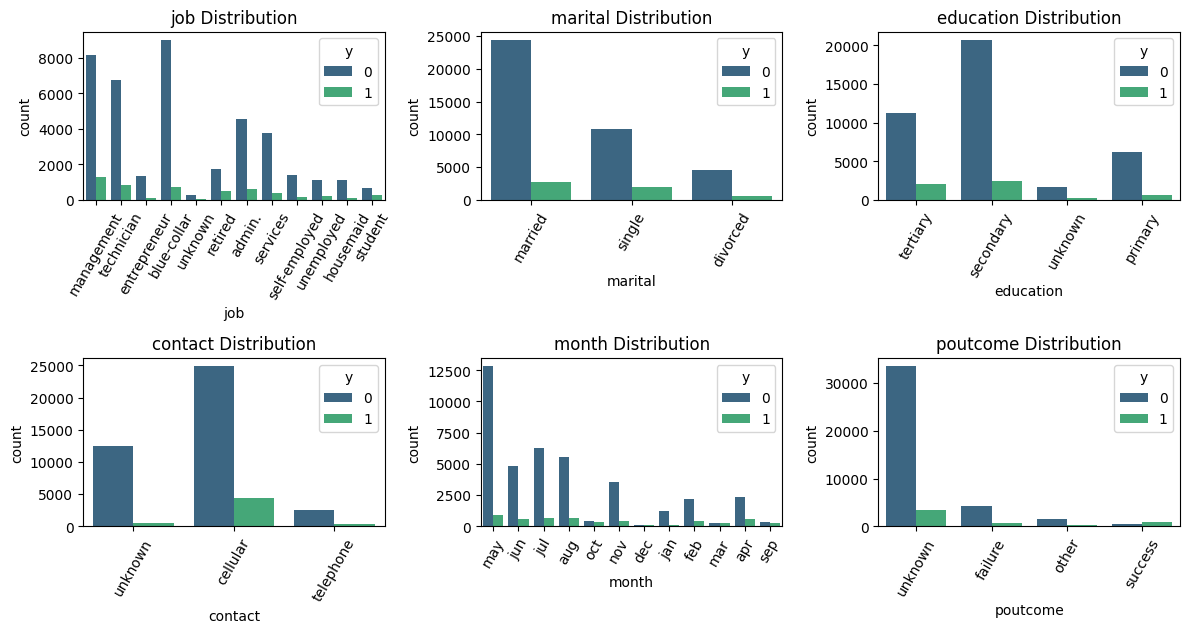

In [ ]:
# Define subplot grid
rows, cols = 4, 3
fig, axes = plt.subplots(rows, cols, figsize=(12, 12))
axes = axes.flatten()

# Plot each categorical column
for i, col_name in enumerate(cat_bank):
    sns.countplot(data=bank, x=bank[col_name], ax=axes[i], palette="viridis", hue='y')
    axes[i].set_title(f"{col_name} Distribution", fontsize=12)
    axes[i].tick_params(axis="x", rotation=60)

# Remove unused axes if cat_cols < rows*cols
for j in range(len(cat_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Key observations, those who subscribe to a term deposit after the campaign:

* Management tend to subscribe to a term deposit, in comparison to other job descriptions. With technicians and blue collared people following up.
* Married people subscribe more than divorced.  
* Those with secondary and then tertiary education 
*  Cellular contact proves to be more efficient. 
* Those last contacted in May reaped best results but it also required a high count. In terms of effort and results, month of September, October, March show the most efficient results. But why is May's count so high? New policies introduced? New campaigns?  
* It is suprising how successful labelled campaigns also failed to have everyone subscribed to a term deposit. While those labelled as a failure still convinced some to subscribe. What does 'other' imply here?


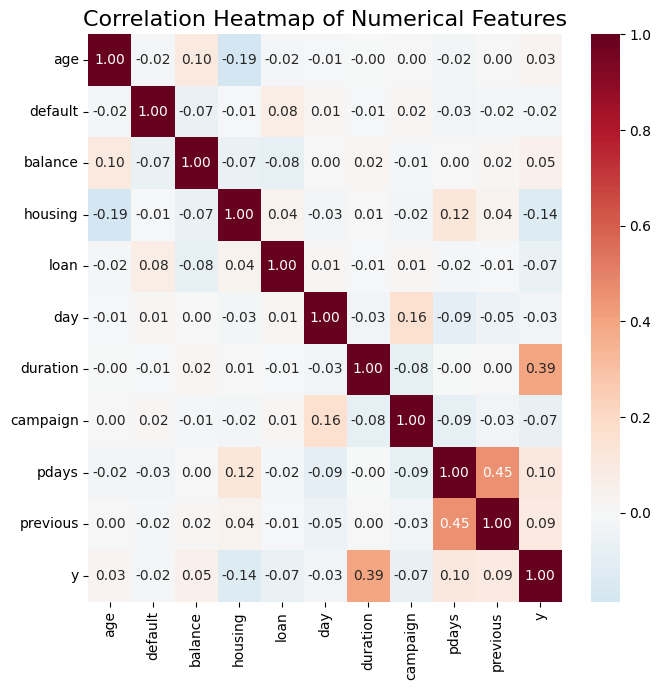

In [ ]:
b_corr = bank[num_bank].corr()

# Plot heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(b_corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0, cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

We notice stronger positive correlation between pdays and previous; balance and age; and lastly, day and campaign. 

Observing the correlation with our target variable, positive (duration, pdays, previous) and negative(housing, campaign, loan).

This implies how the duration of the last contact, number of prev contacts showed us positive relations, which is proportional to the effort put in marketting. 

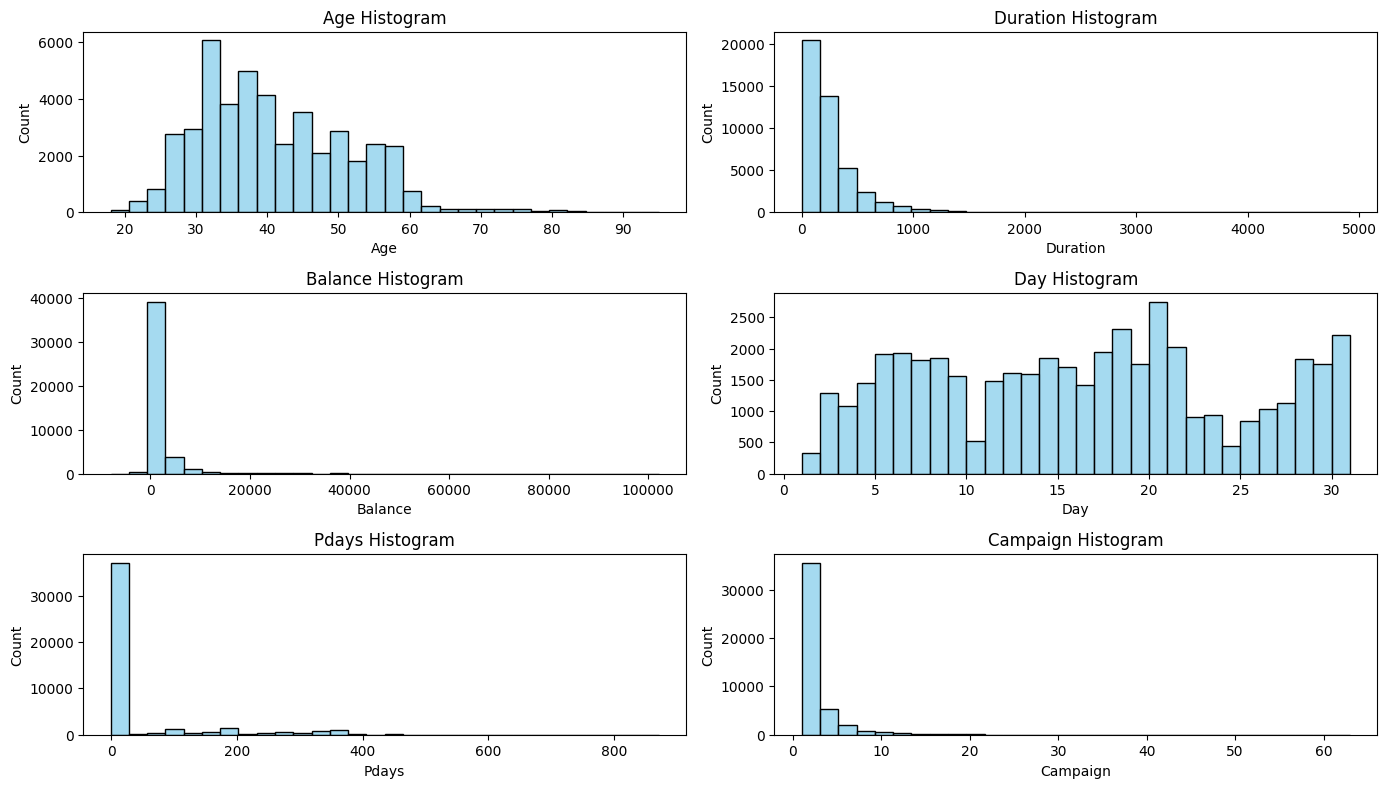

In [ ]:
b_cols = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up grid: 7 rows × 2 columns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(b_cols):
    sns.histplot(bank[col], bins=30, kde=False, color="skyblue", ax=axes[i])
    axes[i].set_title(f"{col.capitalize()} Histogram", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

# Remove unused subplots if there are any
for j in range(len(b_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In our dataset, 

* 30-40 age group are highest
* Call durations are less than 500 seconds in most cases 
* People with low balance have been the target before, which is appropriate as ideally, they would need loans. 
* Campaign calls range between 0-10. 

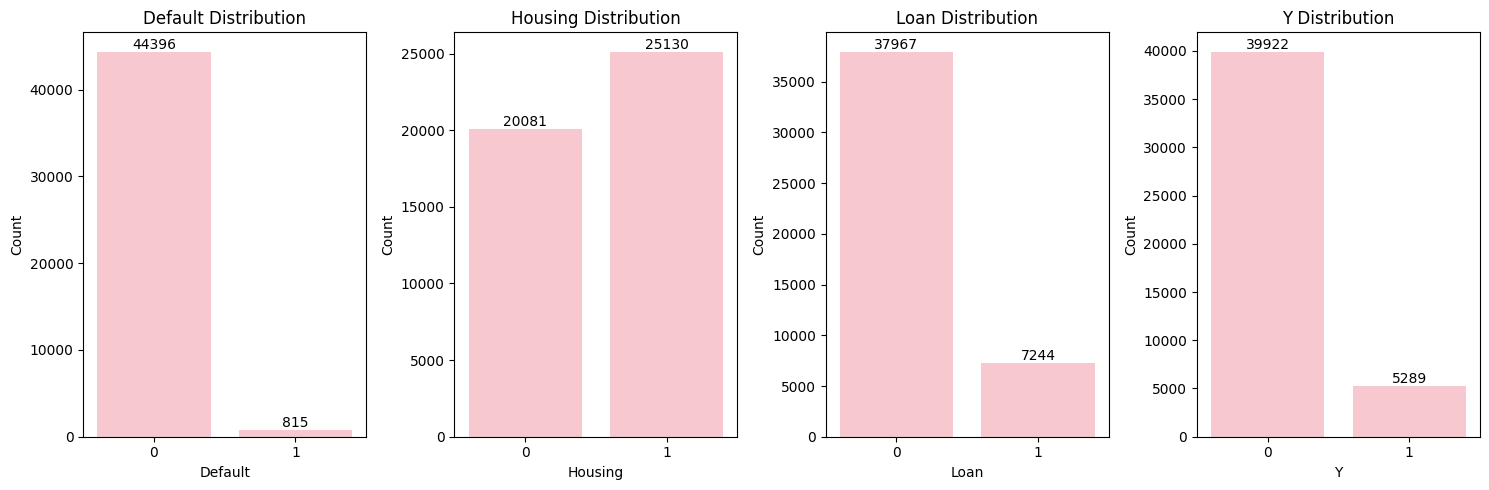

In [ ]:

binary_cols = ['default', 'housing', 'loan', 'y']

# Set up subplots
fig, axes = plt.subplots(1, len(binary_cols), figsize=(15, 5))

# Plot count plots for each binary column
for i, col in enumerate(binary_cols):
    sns.countplot(x=bank[col], ax=axes[i], color="pink")
    axes[i].set_title(f"{col.capitalize()} Distribution", fontsize=12)
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Count")

    for p in axes[i].patches:
        height = p.get_height()
        axes[i].annotate(f'{int(height)}', 
                         xy=(p.get_x() + p.get_width() / 2, height),
                         ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()


* Most people are punctual in repaying
* Slightly more than half records have a housing loan
* while lesser people have personal loans and even lesser take up the subscription. 

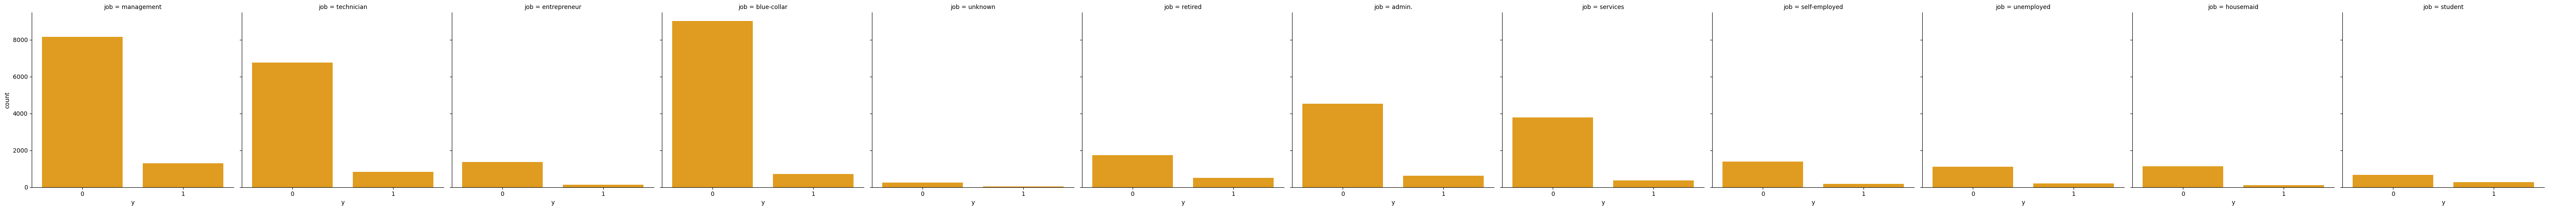

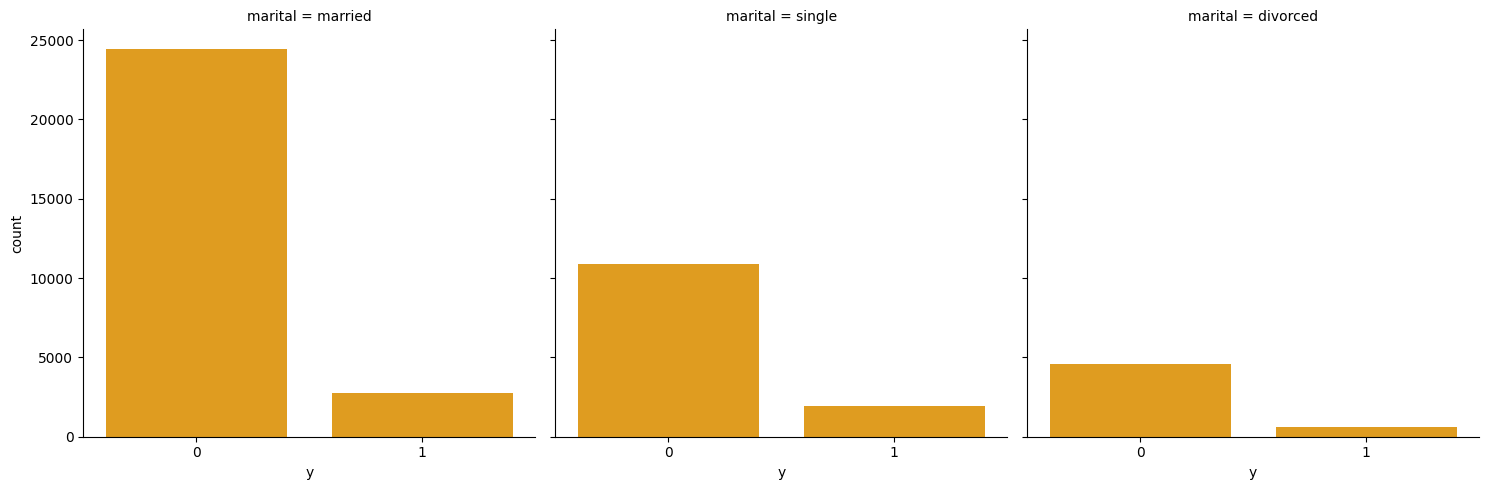

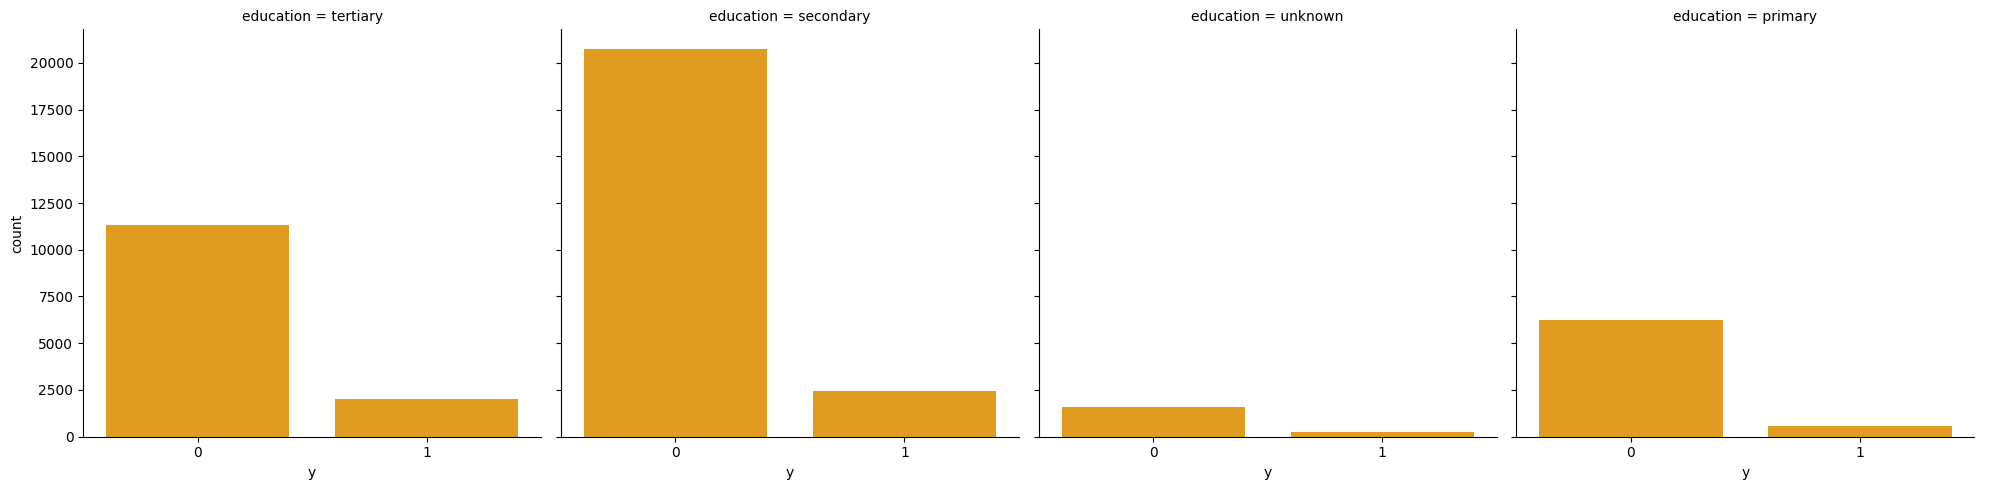

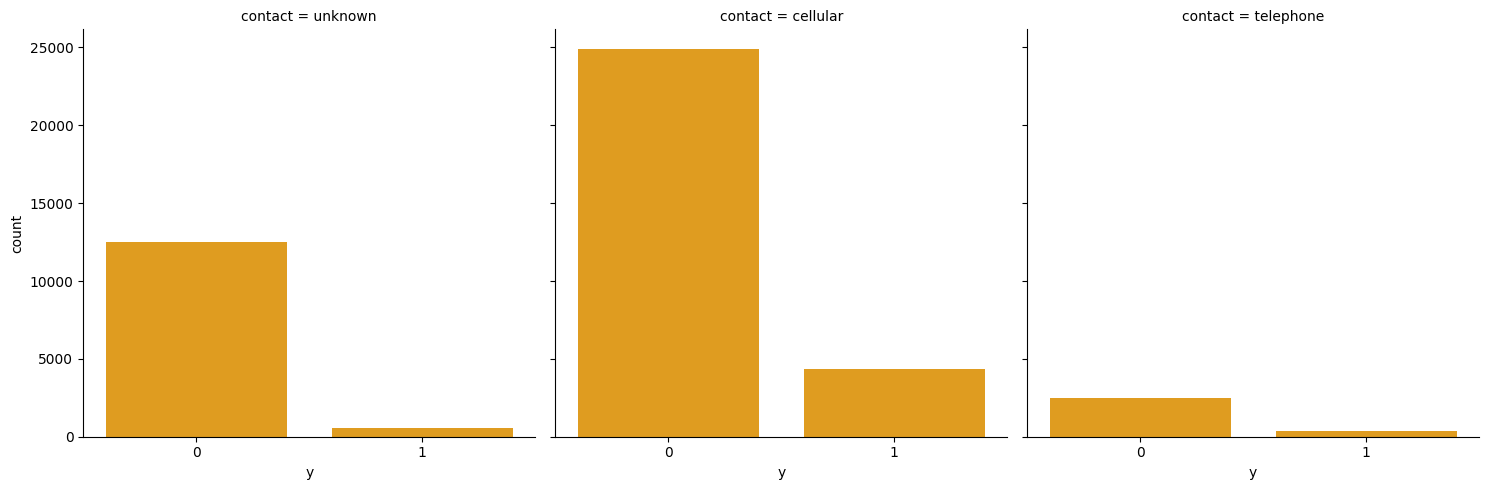

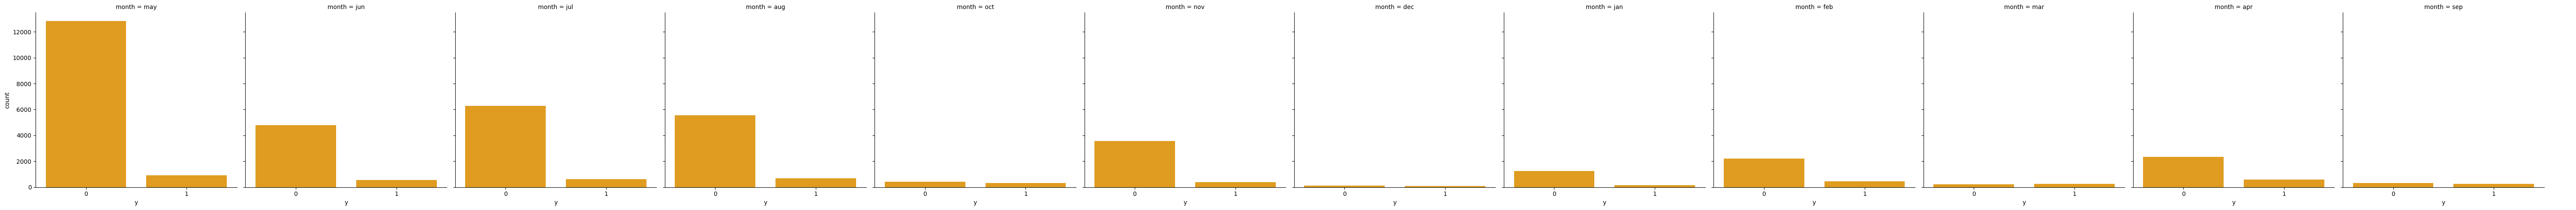

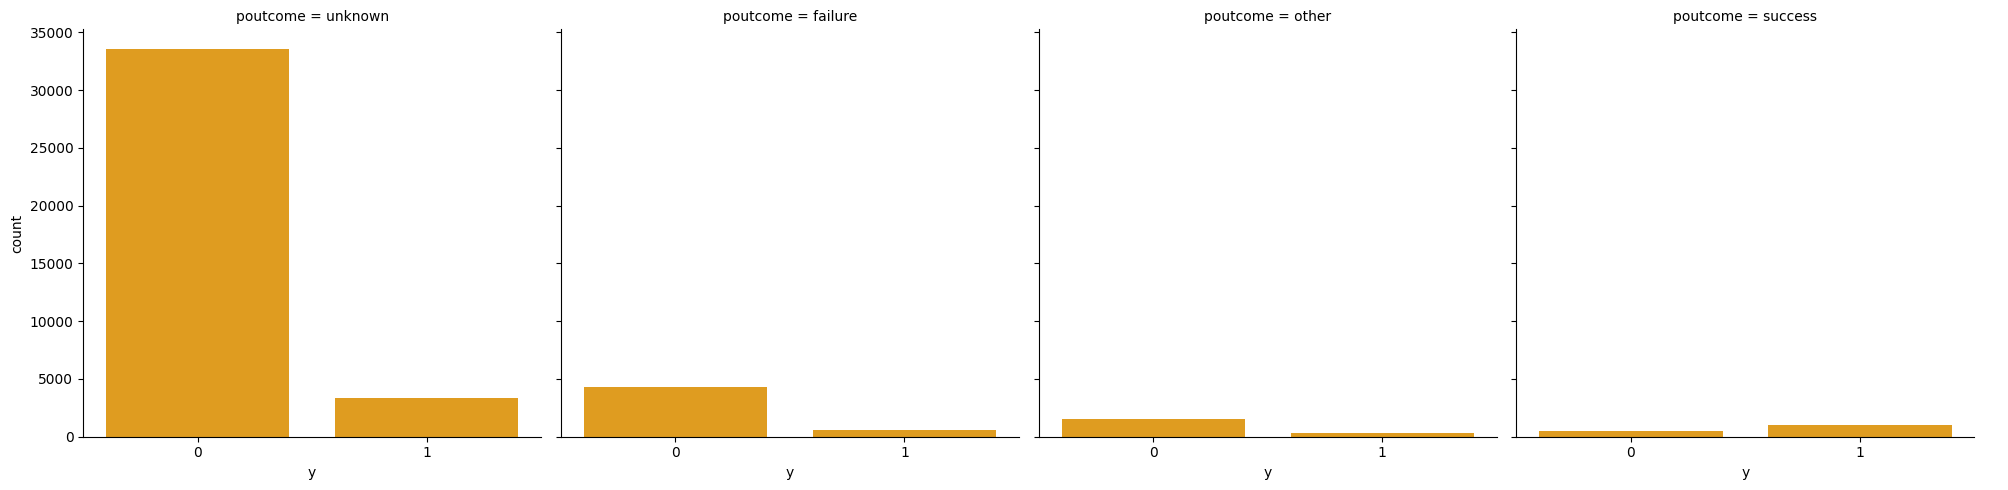

In [ ]:
for categorical_feature in cat_bank:
    sns.catplot(x='y', col=categorical_feature, kind='count', color= "orange" , data= bank)
plt.show()

Shows overall relationship between categorical features and labels.

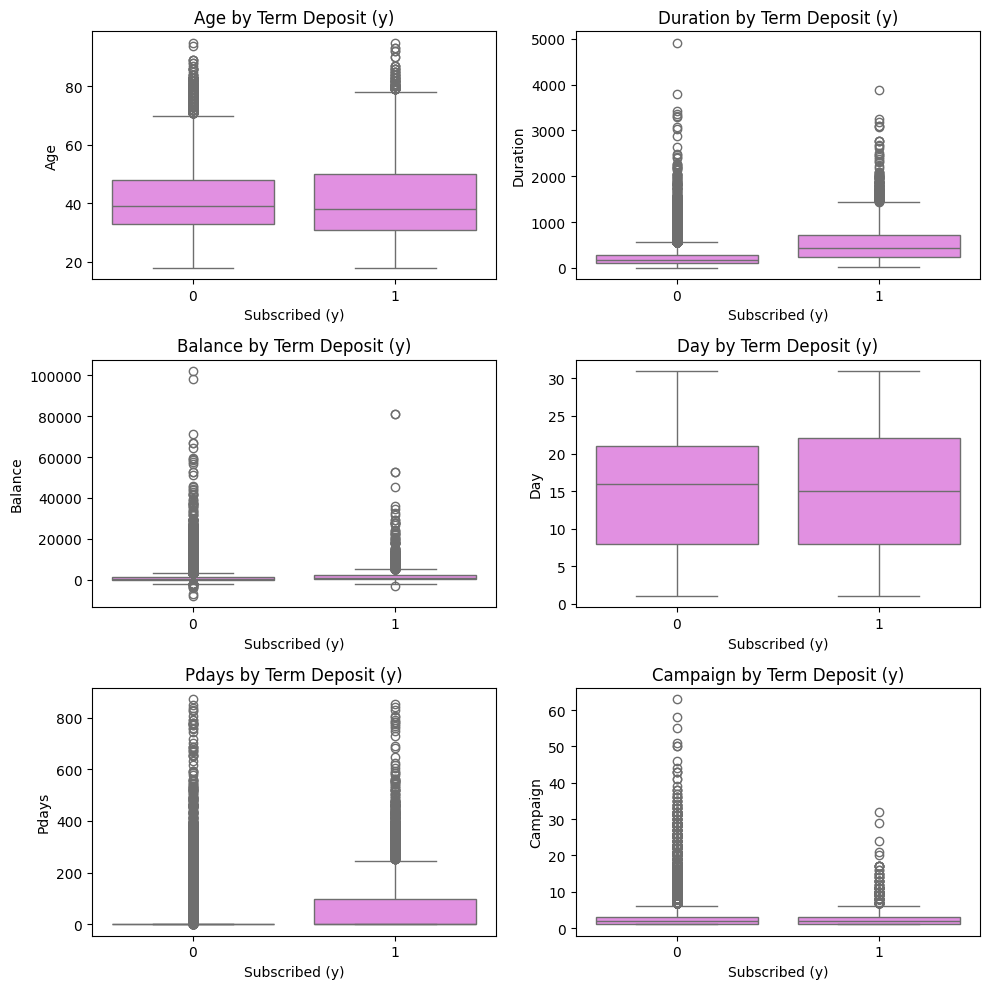

In [ ]:

# List of numeric columns to plot
num1_bank = ['age', 'duration', 'balance', 'day', 'pdays', 'campaign']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(num1_bank):
    sns.boxplot(data=bank, x='y', y=col, ax=axes[i], color='violet')
    axes[i].set_title(f"{col.capitalize()} by Term Deposit (y)", fontsize=12)
    axes[i].set_xlabel("Subscribed (y)")
    axes[i].set_ylabel(col.capitalize())

# Remove unused subplots if any
for j in range(len(num1_bank), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Observations made, majorly getting an idea about the outliers, that end up taking the subscription:
* Age (80 and above)  
* Call duration longer than almost 1500 seconds
* If days of contact for the previous campaign is higher than 250 days 
* campaign contacts greater than 7 or 8 


***

## <span style="background-color:yellow;">TASK 3: Preprocessing</span>

***


Now we deal with unknown in demographic data like job, education, contact, poutcome:

In [ ]:
bank.replace('unknown', np.nan, inplace=True)

# Fill categorical NaNs with mode 
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome']
for col in cat_cols:
    mode_value = bank[col].mode()[0]
    bank[col] = bank[col].fillna(mode_value)


We choose robust scaling instead of standard scaling for normal distribution as our columns are outlier heavy. 

In [ ]:
from sklearn.preprocessing import RobustScaler

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']
scaler = RobustScaler()
bank[num_cols] = scaler.fit_transform(bank[num_cols])


From my list of outliers:

a) age — natural range (17–100). Outliers above 90 may be rare but real; so we cap them.

b) duration — phone call duration, has a long right tail. Outliers are not errors but indicate long calls, so it is better to log transform.

c) pdays — number of days since last campaign contact; and we treat -1 as a special case (never contacted)

d) campaign — number of contacts during this campaign; small integers, but large outliers (dozens of calls) so we clip high values.

e) balance — average yearly balance, can have huge positive/negative values, we can winsorize or log transform.

In [ ]:
# we clip outliers for age and campaign
for col in ['age', 'campaign']:
    lower, upper = bank[col].quantile([0.01, 0.99]) #99 percentile
    bank[col] = bank[col].clip(lower, upper)

bank['pdays'] = bank['pdays'].replace(-1, np.nan)
bank['pdays'] = bank['pdays'].fillna(0) 
#using mean/median would distort our clusters.

# Log transform highly skewed columns
for col in ['balance', 'duration']:
    bank[col] = np.log1p(bank[col] - bank[col].min() + 1)

bank[['age','balance','duration','pdays','campaign']].describe()


,age,balance,duration,pdays,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,0.125844,2.170057,1.112984,41.197828,0.345701
std,0.692284,0.170335,0.290600,100.128746,1.292870
min,-1.066667,0.693147,0.693147,0.000000,-0.500000
25%,-0.400000,2.075285,0.906988,0.000000,-0.500000
50%,0.000000,2.109498,1.041454,0.000000,0.000000
75%,0.600000,2.193530,1.246127,0.000000,0.500000
max,2.133333,4.421591,3.209573,872.000000,7.000000


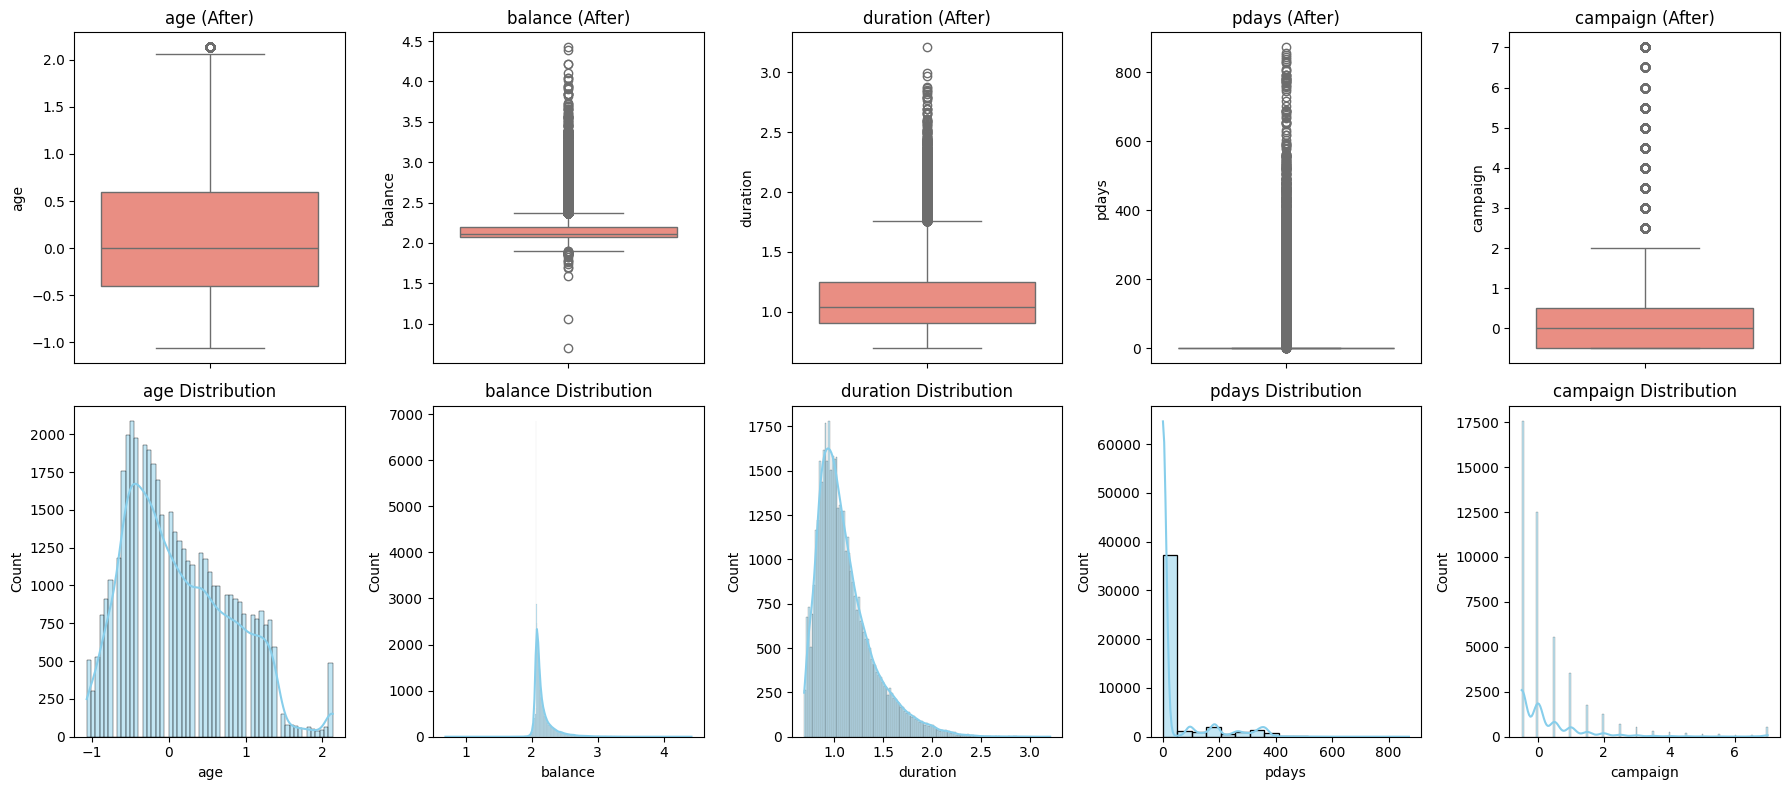

In [ ]:
cols_to_check = ['age','balance','duration','pdays','campaign']

fig, axes = plt.subplots(2, len(cols_to_check), figsize=(18, 8))
for i, col in enumerate(cols_to_check):
    sns.boxplot(y=bank[col], ax=axes[0, i], color='salmon')
    axes[0, i].set_title(f'{col} (After)')

    sns.histplot(bank[col], ax=axes[1, i], kde=True, color='skyblue')
    axes[1, i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()


This works for clustering and eventualluy dimension reduction as:

Clipping avoids rare extremes dominating Euclidean distances.

Log transform stabilizes spread for PCA, prevents huge variance directions.

Replacing -1 in pdays makes feature more meaningful for distance-based algorithms.

After this, we can standardize our numeric features before PCA or K-Means.

In [ ]:
# Binary encoding (done previously, showing for reporting purposes)
# binary_cols = ['default', 'housing', 'loan', 'y']
# for col in binary_cols:
#     bank[col] = bank[col].map({'yes': 1, 'no': 0})

# One-hot encoding
bank = pd.get_dummies(bank, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)


We encoding categorical data such that it can be processed by the algorithm. 

Now we can try out undersampling since our target variable is imbalanced. This will help in our supervised models (like PCA). How much of an impact will this have on our clustering models? 

In [ ]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X = bank.drop('y', axis=1)
y = bank['y']

print("Before undersampling:", Counter(y))


Before undersampling: Counter({0: 39922, 1: 5289})


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print("After undersampling:", Counter(y_res))

After undersampling: Counter({0: 5289, 1: 5289})


/Users/nehapalak/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/nehapalak/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
bank1 = pd.concat([X_res, y_res], axis=1) #new dataframe 


*** 

## <span style="background-color:yellow;">TASK 4: Clustering Methods</span>

***

For clustering, I choose the following: 
* K-Means (good for compact spherical clusters)
* DBSCAN (good for arbitrary-shaped clusters and detecting noise/outliers)

Hyperparameters:
* K-Means : number of clusters k (use elbow method or domain knowledge)
* DBSCAN : eps (distance threshold) and minPts

In [ ]:
# Preprocessed dataset
X = bank1.to_numpy(dtype=float)

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
def kmeans(X, k=4, max_iter=100):
    n = X.shape[0]
    centers = X[np.random.choice(n, k, replace=False)]
    for _ in range(max_iter):
        # Assign to nearest center
        dists = np.sqrt(((X[:, None] - centers[None, :])**2).sum(axis=2))
        labels = np.argmin(dists, axis=1)
        # Update centers
        new_centers = np.array([X[labels==i].mean(axis=0) for i in range(k)])
        if np.allclose(new_centers, centers):
            break
        centers = new_centers
    return labels, centers

# Cluster preprocessed data
labels_km, centers_km = kmeans(X_scaled, k=4)

In [ ]:
def pairwise_distance(X):
    n = X.shape[0]
    D = np.zeros((n,n))
    for i in range(n):
        for j in range(i,n):
            d = np.linalg.norm(X[i]-X[j])
            D[i,j] = D[j,i] = d
    return D

def dbscan(X, eps=2.0, min_samples=10):
    n = X.shape[0]
    labels = np.full(n, -1)
    D = pairwise_distance(X)
    cluster_id = 0
    for i in range(n):
        if labels[i] != -1:  
            continue
        neighbors = np.where(D[i] <= eps)[0]
        if len(neighbors) < min_samples:
            continue
        labels[i] = cluster_id
        seeds = list(neighbors)
        for s in seeds:
            if labels[s] == -1:
                labels[s] = cluster_id
        cluster_id += 1
    return labels

labels_db = dbscan(X_scaled, eps=2.0, min_samples=10)


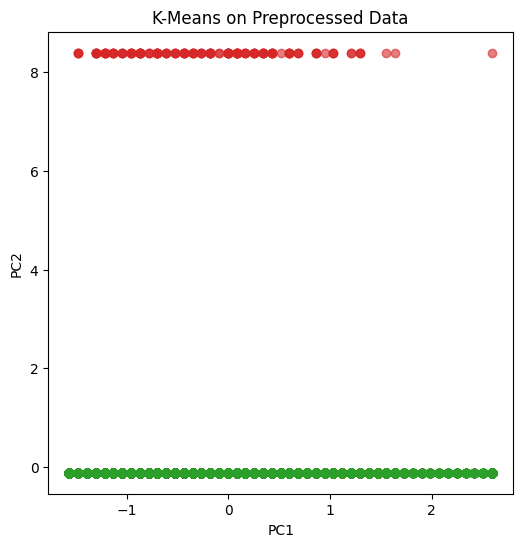

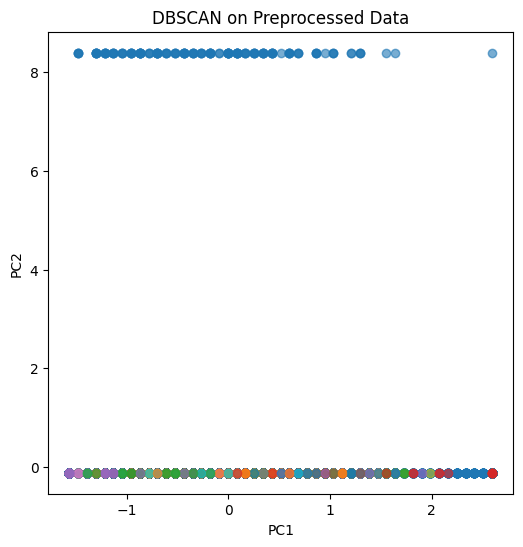

In [ ]:
def plot_clusters(X2, labels, title=""):
    plt.figure(figsize=(6,6))
    unique = np.unique(labels)
    for l in unique:
        mask = labels==l
        lbl = 'noise' if l==-1 else f'Cluster {l}'
        plt.scatter(X2[mask,0], X2[mask,1], alpha=0.6, label=lbl)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    # plt.legend() as it was creating a long list of clusters in the legend
    plt.show()

# Pre-dimension reduction visualization

plot_clusters(X_scaled, labels_km, "K-Means on Preprocessed Data")
plot_clusters(X_scaled, labels_db, "DBSCAN on Preprocessed Data")


In [ ]:
def silhouette_simple(X, labels):
    n = X.shape[0]
    s = []
    unique_labels = np.unique(labels)
    
    for i in range(n):
        li = labels[i]
        # skip noise points
        if li == -1:
            continue
        
        same_mask = (labels == li)
        other_mask = (labels != li) & (labels != -1)
        same = X[same_mask]
        other_labels = np.unique(labels[other_mask])
        
        # skip if cluster has only this point or no other clusters
        if len(same) <= 1 or len(other_labels) == 0:
            continue
        
        # intra-cluster distance
        a = np.mean(np.linalg.norm(same - X[i], axis=1))
        
        # nearest other cluster distance
        b_list = []
        for j in other_labels:
            points_j = X[labels == j]
            if len(points_j) == 0:
                continue
            b_list.append(np.mean(np.linalg.norm(points_j - X[i], axis=1)))
        if len(b_list) == 0:
            continue
        b = min(b_list)
        
        s.append((b - a) / max(a, b))
    
    return np.mean(s) if len(s) > 0 else np.nan

# Check scores
print("Before Dimension Reduction: \nK-Means Silhouette:", silhouette_simple(X_scaled, labels_km))
print("DBSCAN Silhouette:", silhouette_simple(X_scaled, labels_db))

Before Dimension Reduction: 
K-Means Silhouette: 0.08375723328527993
DBSCAN Silhouette: 0.2964076353498095


 Pros & Cons :


 K-Means:
 - Pros: Fast, easy to implement, works well for spherical clusters
 - Cons: Needs k, sensitive to outliers, assumes equal cluster sizes

 DBSCAN:
 - Pros: Can find arbitrary shaped clusters, identifies noise
 - Cons: Sensitive to eps/min_samples, struggles with varying density

*** 

## <span style="background-color:yellow;">TASK 5: Dimensionality Reduction</span>

***

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

PCA for dimension reduction:

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

print("PCA explained variance ratio:", pca.explained_variance_ratio_)

PCA explained variance ratio: [0.07128331 0.06424721]


For experiment purposes, also trying LDA: 

In [ ]:
y_labels = LabelEncoder().fit_transform(bank1['y']) if 'y' in bank1.columns else None

if y_labels is not None:
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(X_scaled, y_labels)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

*** 

## <span style="background-color:yellow;">TASK 6: Clustering After Dimensionality Reduction</span>

***

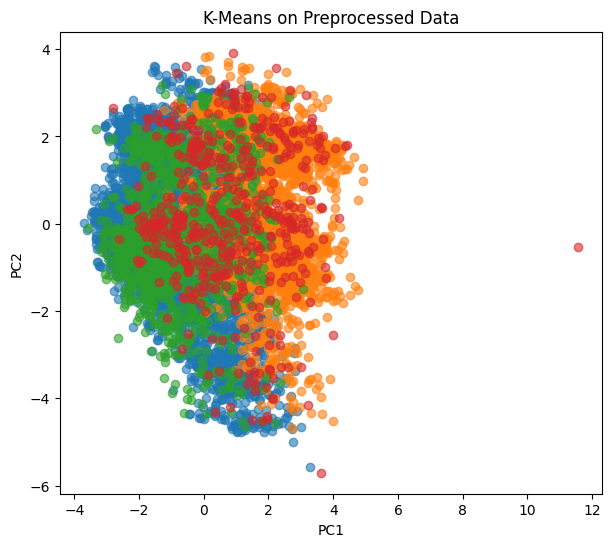

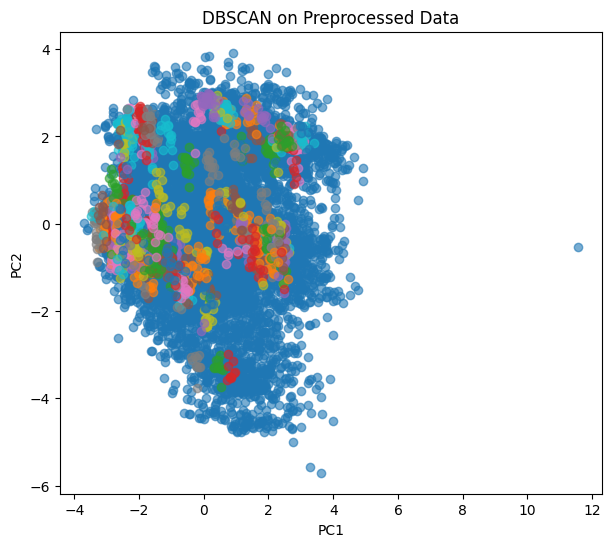

In [ ]:
def plot_clusters(X2, labels, title=""):
    plt.figure(figsize=(7,6))
    unique = np.unique(labels)
    for l in unique:
        mask = labels==l
        lbl = 'noise' if l==-1 else f'Cluster {l}'
        plt.scatter(X2[mask,0], X2[mask,1], alpha=0.6, label=lbl)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)
    # plt.legend()
    plt.show()

# Pre-dimension reduction visualization
plot_clusters(X_2d, labels_km, "K-Means on Preprocessed Data")
plot_clusters(X_2d, labels_db, "DBSCAN on Preprocessed Data")


In [ ]:
print("After Dimension Reduction: \nK-Means Silhouette:", silhouette_simple(X_2d, labels_km))
print("DBSCAN Silhouette:", silhouette_simple(X_2d, labels_db))

After Dimension Reduction: 
K-Means Silhouette: 0.016971791948102225
DBSCAN Silhouette: -0.17031553325252816


*** 

## <span style="background-color:yellow;">TASK 7: Comparison and Discussion</span>

***

In [ ]:
print("===== Comparison Table =====")
print("Before Dimension Reduction: \nK-Means Silhouette:", silhouette_simple(X_scaled, labels_km))
print("DBSCAN Silhouette:", silhouette_simple(X_scaled, labels_db))
print("After Dimension Reduction: \nK-Means Silhouette:", silhouette_simple(X_2d, labels_km))
print("DBSCAN Silhouette:", silhouette_simple(X_2d, labels_db))


# You can now discuss:
# - Which method performed better (higher silhouette, lower DB index)
# - Effect of PCA on cluster separation and compactness
# - Limitations: DBSCAN sensitivity to eps, K-Means assumes spherical clusters

===== Comparison Table =====
After Dimension Reduction: 
K-Means Silhouette: 0.06373237041817957
DBSCAN Silhouette: 0.2964076353498095
After Dimension Reduction: 
K-Means Silhouette: 0.016971791948102225
DBSCAN Silhouette: -0.17031553325252816


*** 

## <span style="background-color:yellow;">TASK 8: Conclusion</span>

***


***
# <span style="background-color:yellow;">TASK 9: References</span>

***

* How to handle outliers? https://www.youtube.com/watch?v=jmAuVP_UOn0
* KMean from scratch: https://towardsdatascience.com/create-your-own-k-means-clustering-algorithm-in-python-d7d4c9077670/
* DBSCAN from scratch: https://scrunts23.medium.com/dbscan-algorithm-from-scratch-in-python-475b82e0571c
* PCA : https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/

* For variable descriptions: https://archive.ics.uci.edu/dataset/222/bank+marketing and bank_name file in the downloaded datazip. 
* Research paper the dataset was used in: 
 S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.